In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn import ensemble
import matplotlib
plt.style.use(['science','ieee','no-latex'])
plt.rcParams['font.sans-serif']=['SimHei']    #指定默认字体 SimHei为黑体
plt.rcParams['axes.unicode_minus']=False   #用来|正常显示负号
matplotlib.rcParams['font.family'] = 'SimHei'  
matplotlib.rcParams['font.sans-serif'] = 'NSimSun,Times New Roman'
from sklearn.ensemble import GradientBoostingRegressor
pd.set_option('display.max_columns', None)

In [2]:
train_data = pd.ExcelFile('训练集.xlsx')
train_pro = train_data.parse('分省')
#display(train_pro.info())
#display(train_pro.head())
validation_data = pd.ExcelFile('验证集.xlsx')
validation = validation_data.parse('Sheet1')
col = ['GDP','LDP','BA','POP','CCF','FCE','UR']

In [3]:
train_pro_dna = train_pro.dropna()
train_pro_dna = train_pro_dna.drop(train_pro_dna[train_pro_dna.PROVINCE=='全国'].index)
X = train_pro_dna[col].values
Y = train_pro_dna.loc[:, 'SLUDGE'].values

x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.3,random_state=0)

#forest = GradientBoostingRegressor(n_estimators=4000,random_state=0)

forest = RandomForestRegressor(
         n_estimators=4000,
         random_state=0,
         n_jobs=-1)
forest.fit(x_train,y_train)

score_test = forest.score(x_test, y_test)
result_test = forest.predict(x_test)
print('训练精度：{}'.format(forest.score(x_train, y_train)))

predict_pro = pd.read_csv('final_result.csv', encoding='utf-8') 


for name in col:
    predict_pro[name] = predict_pro[name]*1.05
qg1 = predict_pro
qg1['result+'] = forest.predict(predict_pro[col])

训练精度：0.9667823328413541


In [4]:
predict_pro = pd.read_csv('final_result.csv', encoding='utf-8') 


for name in col:
    predict_pro[name] = predict_pro[name]*0.95
qg2 = predict_pro
qg2['result-'] = forest.predict(predict_pro[col])
qg2['result+'] = qg1['result+']
qg2.to_csv('uncertainties.csv',encoding='utf_8_sig')

In [5]:
qg2_2060 = qg2[qg2['YEAR'] == 2060]
qg2_2060 = qg2_2060.groupby(['SSP']).sum().reset_index()


不确定性分析
1.观测值的不确定性：原始数据的不确定性
2.参数的不确定性：污泥预测自变量的不确定性——情境分析降低不确定性，自变量取左右%5的区间作为进入预测模型
3.随机森林模型的不确定性：GridSearch，CV，寻求在test集中精度最高的模型参数

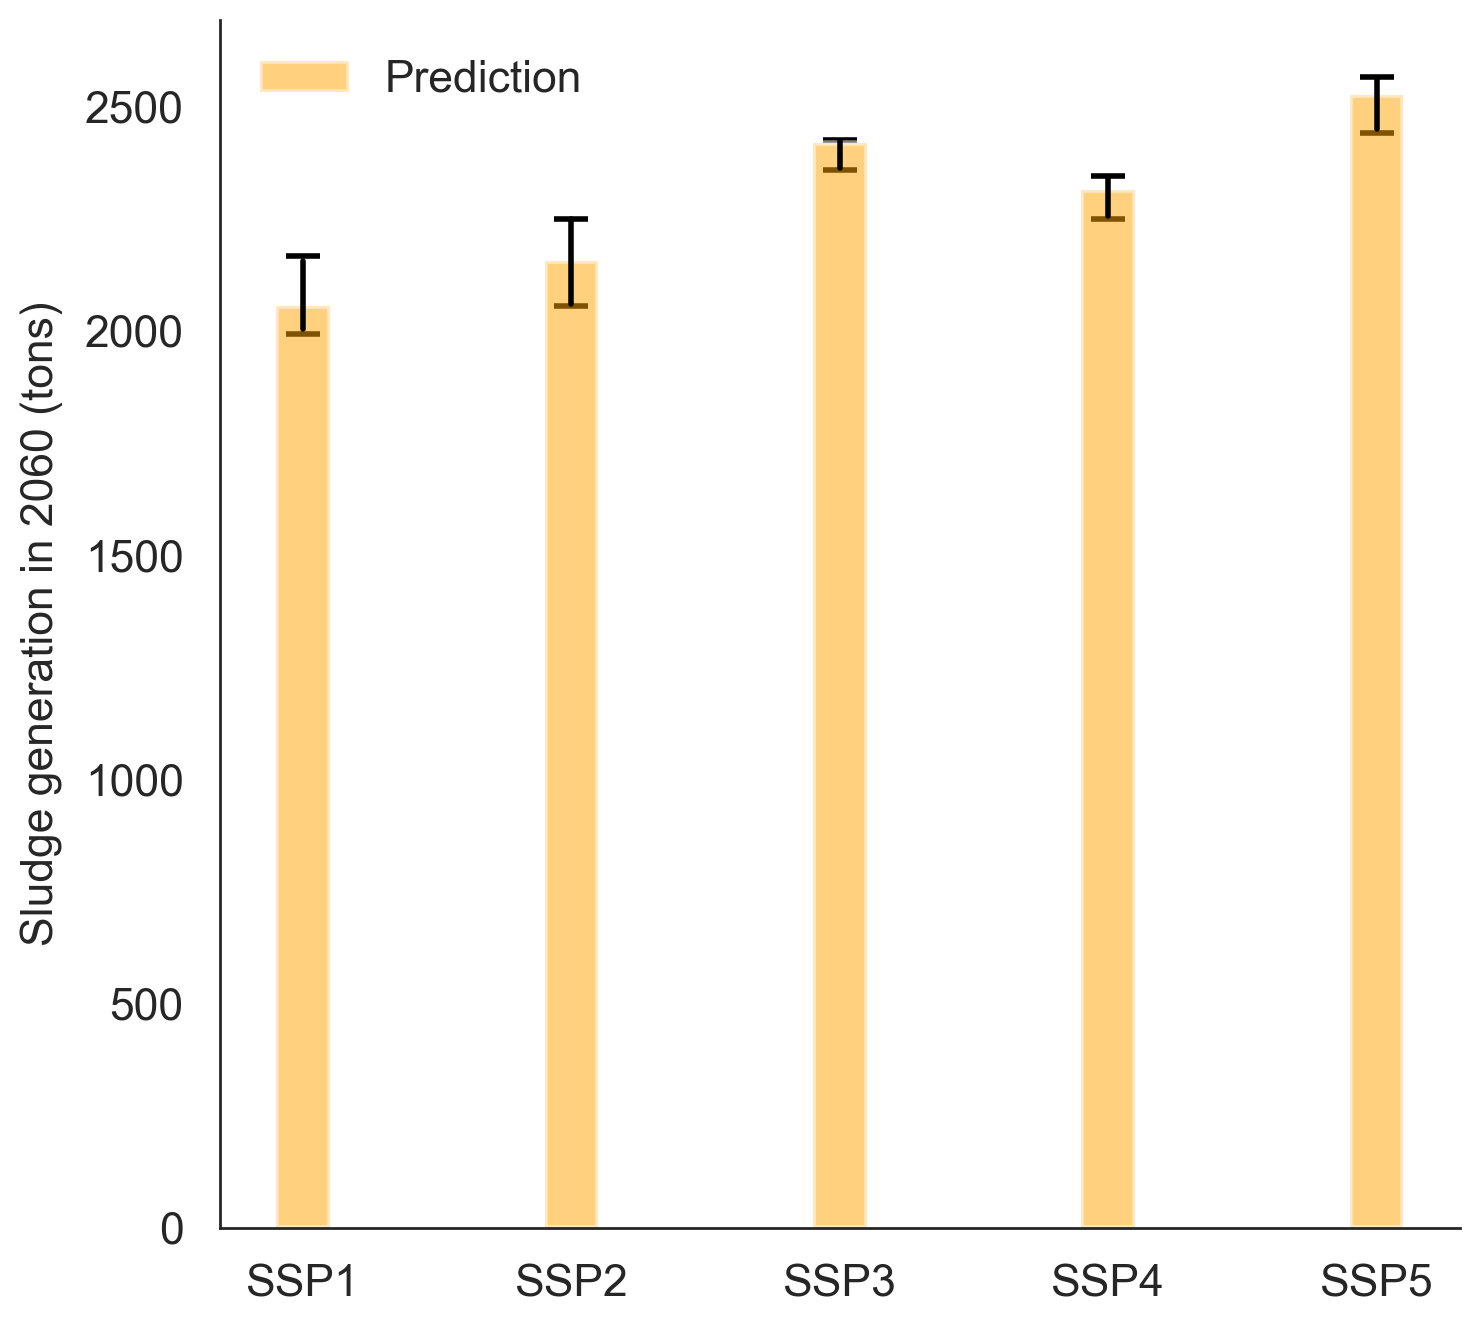

In [61]:
plt.figure(figsize=(4, 4), dpi=400)

sns.set_style('white')
num = np.arange(0,len(qg2_2060['result-']), 1)

bar_width = 0.2
#plt.bar(num-bar_width, qg2_2060['result+']/10000, bar_width, align="center", color="red", label="Upper bound",
#       alpha=0.5)
plt.scatter(num, qg2_2060['result+']/10000, marker='_')
plt.scatter(num, qg2_2060['result-']/10000, marker='_',color='black')
plt.bar(num, qg2_2060['SLUDGE_PRED']/10000, bar_width, align="center", color="orange", label="Prediction",
       alpha=0.5)

    
#plt.bar(num+bar_width, qg2_2060['result-']/10000, bar_width, align="center", color="c", label="Lower bound",
 #      alpha=0.5)

plt.axvline(x=0, ymin=0.744, ymax=0.8)
plt.axvline(x=1, ymin=0.765, ymax=0.835)
plt.axvline(x=2, ymin=0.877, ymax=0.90)
plt.axvline(x=3, ymin=0.838, ymax=0.87)
plt.axvline(x=4, ymin=0.91, ymax=0.95)

plt.xticks(num, qg2_2060['SSP'])
plt.ylabel('Sludge generation in 2060 (tons)')
#plt.yticks([0.05, 0.1, 0.15, 0.2],["5%","10%","15%","20%"])

plt.legend(frameon=False)
sns.despine()
plt.savefig('1.jpg',dpi=400, bbox_inches='tight')
#plt.savefig('4.png', dpi=400, bbox_inches = 'tight')

In [3]:
#col = ['GDP','LDP','BA','POP']
#col = ['GDP','LDP','BA','POP','CCF']
col = ['GDP','LDP','BA','POP','CCF','FCE','UR']
#col = ['GDP','POP']

训练精度：0.9667823328413541


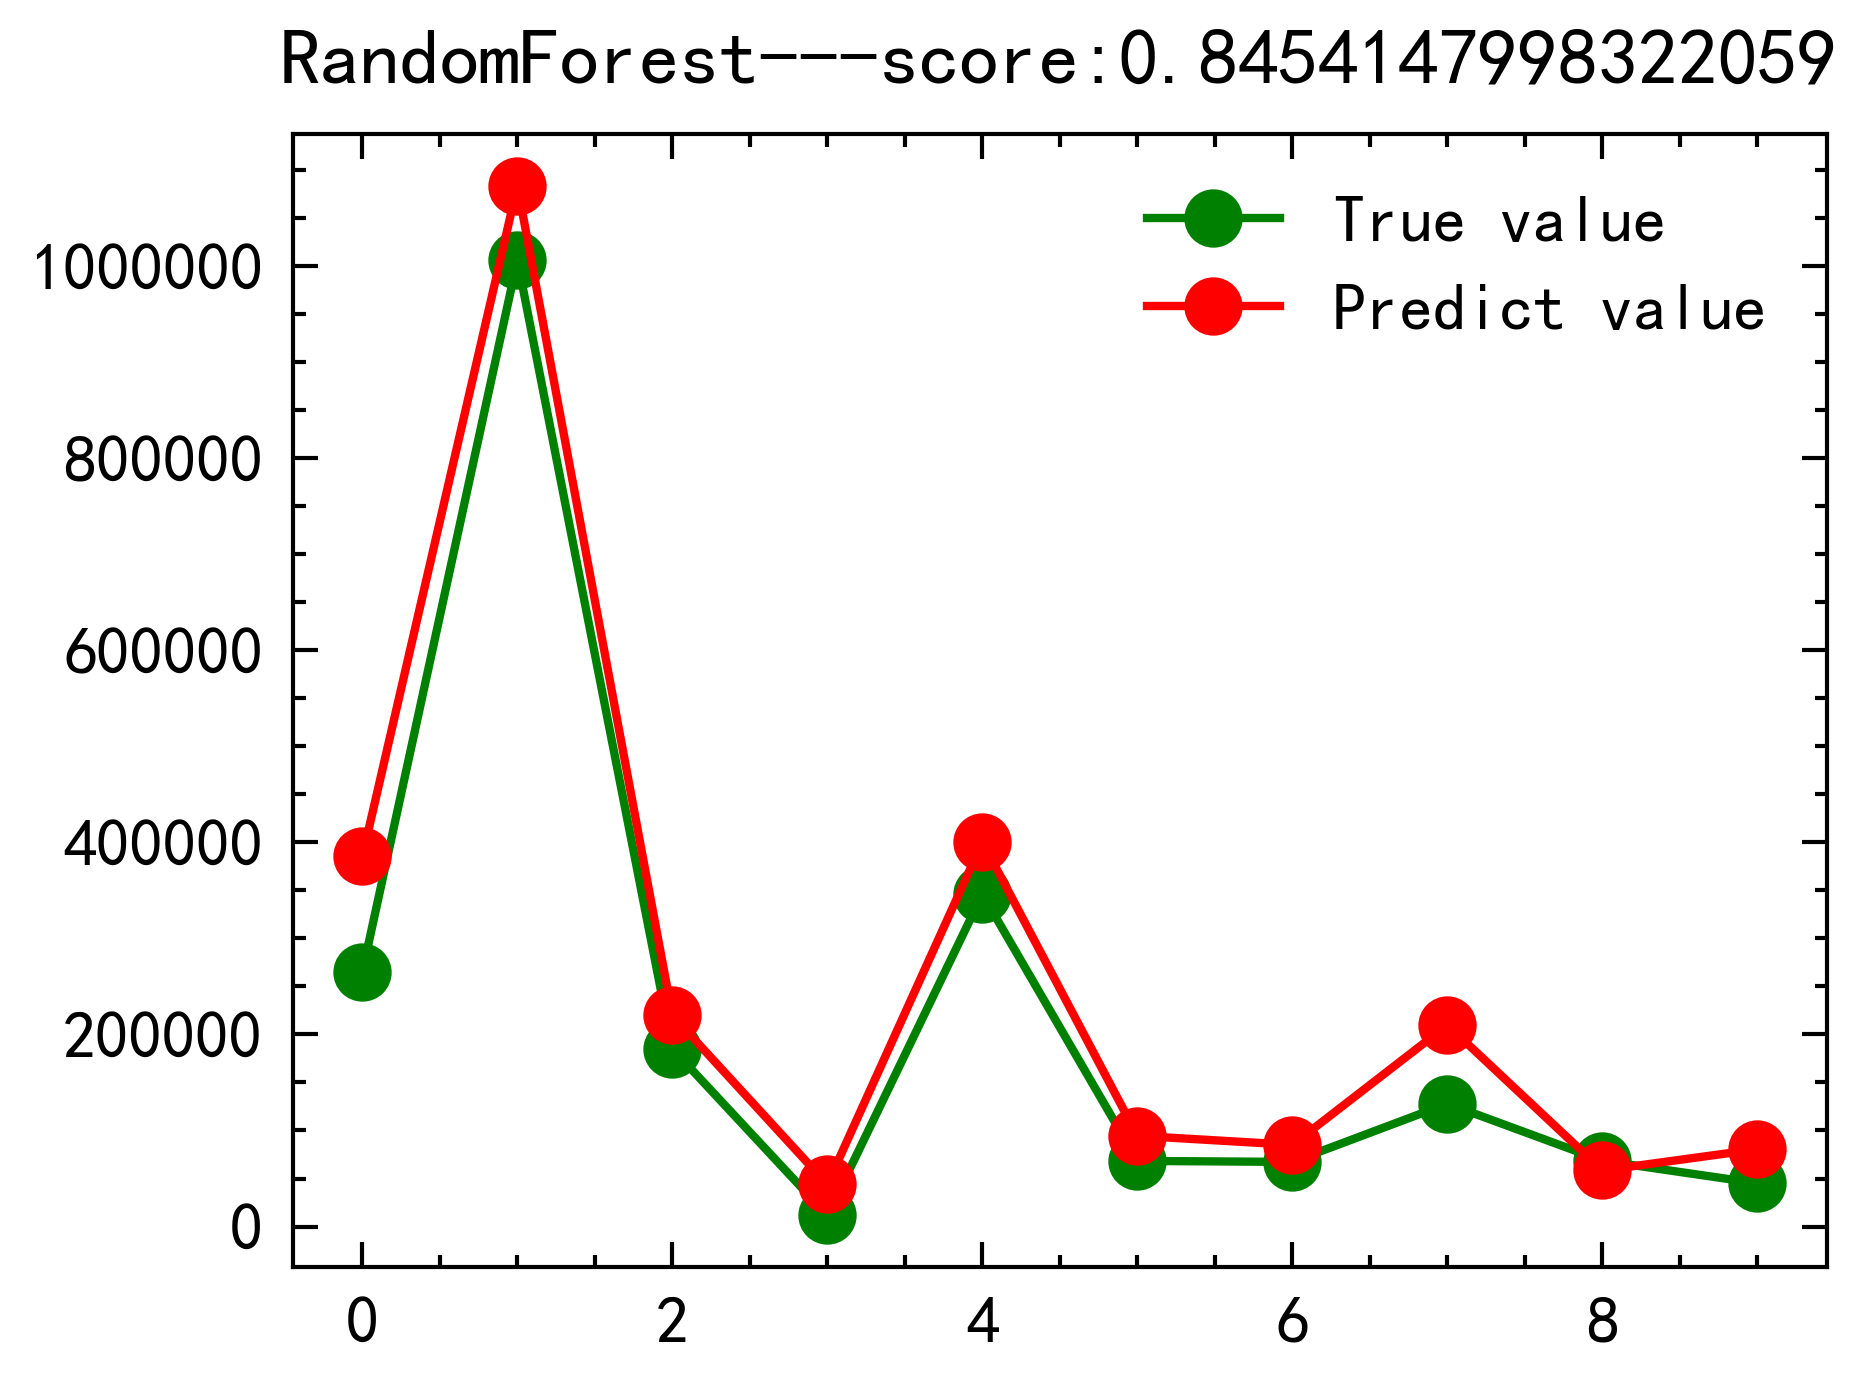

In [4]:
#训练模型_分省
train_pro_dna = train_pro.dropna()
train_pro_dna = train_pro_dna.drop(train_pro_dna[train_pro_dna.PROVINCE=='全国'].index)
X = train_pro_dna[col].values
Y = train_pro_dna.loc[:, 'SLUDGE'].values

x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.3,random_state=0)

#forest = GradientBoostingRegressor(n_estimators=4000,random_state=0)

forest = RandomForestRegressor(
         n_estimators=4000,
         random_state=0,
         n_jobs=-1)
forest.fit(x_train,y_train)

score_test = forest.score(x_test, y_test)
result_test = forest.predict(x_test)
print('训练精度：{}'.format(forest.score(x_train, y_train)))
plt.figure()
#只取前一百条可视化，因为数据太多了
plt.plot(np.arange(10), y_test[:10], "go-", label="True value")
plt.plot(np.arange(10), result_test[:10], "ro-", label="Predict value")
plt.title(f"RandomForest---score:{score_test}")
plt.legend(loc="best")
plt.show()

In [5]:
'''
param_grid = {'max_features':np.arange(1,5)}
rfc = RandomForestRegressor(n_estimators=3000
                            ,random_state=0
                            )
GS = GridSearchCV(rfc, param_grid, cv=10)
GS.fit(x_train, y_train)
best_param = GS.best_params_
best_score = GS.best_score_
print(best_param, best_score)     
'''

"\nparam_grid = {'max_features':np.arange(1,5)}\nrfc = RandomForestRegressor(n_estimators=3000\n                            ,random_state=0\n                            )\nGS = GridSearchCV(rfc, param_grid, cv=10)\nGS.fit(x_train, y_train)\nbest_param = GS.best_params_\nbest_score = GS.best_score_\nprint(best_param, best_score)     \n"

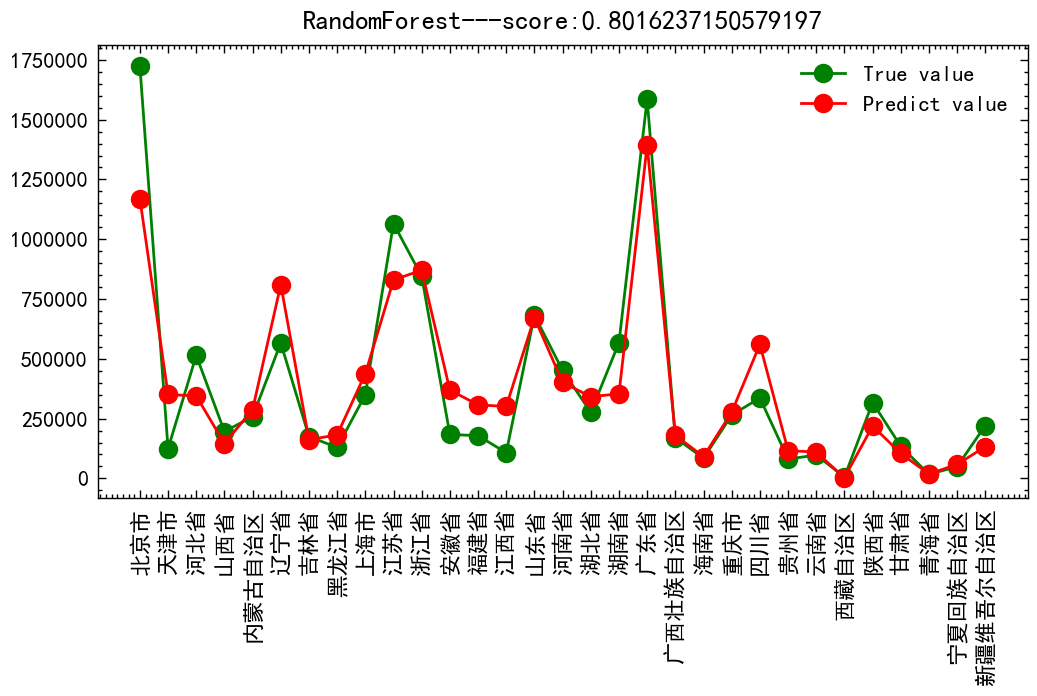

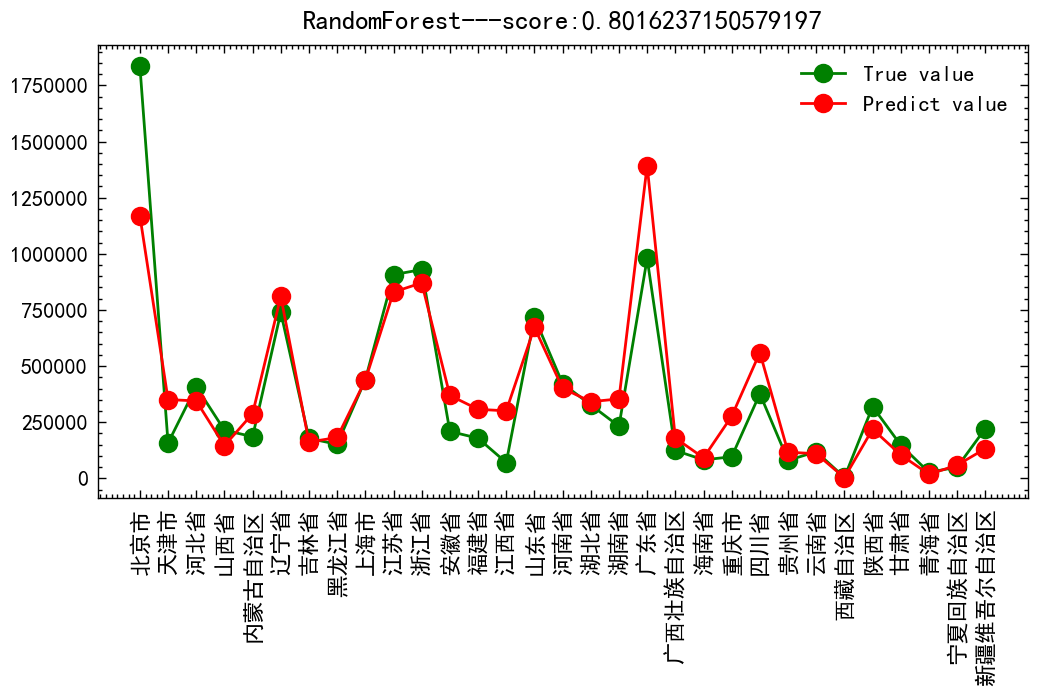

In [6]:
#验证集|

validation = validation.drop(validation[validation.PROVINCE=='全国'].index)
validation_vald = validation[col]




score_vald = forest.score(validation_vald, validation['SLUDGE'])
result_vald = forest.predict(validation_vald)



plt.figure(figsize=(6,3), dpi=200)
plt.plot(validation[validation['YEAR']==2018]['PROVINCE'], validation[validation['YEAR']==2018]['SLUDGE'], "go-", label="True value")
plt.plot(validation[validation['YEAR']==2018]['PROVINCE'], result_vald[:sum(validation['YEAR']==2018)], "ro-", label="Predict value")
plt.title(f"RandomForest---score:{score_vald}")
plt.xticks(rotation=90)
plt.legend(loc="best")
plt.show()

plt.figure(figsize=(6,3), dpi=200)
plt.plot(validation[validation['YEAR']==2019]['PROVINCE'], validation[validation['YEAR']==2019]['SLUDGE'], "go-", label="True value")
plt.plot(validation[validation['YEAR']==2019]['PROVINCE'], result_vald[:sum(validation['YEAR']==2019)], "ro-", label="Predict value")
plt.title(f"RandomForest---score:{score_vald}")
plt.xticks(rotation=90)
plt.legend(loc="best")
plt.show()
# 下面对训练好的随机森林，完成重要性评估
# feature_importances_  可以调取关于特征重要程度
#importances = forest.feature_importances_
#print("重要性：", importances)
#x_columns = col
#返回数组从大到小的索引值
#indices = np.argsort(importances)[::-1]
#for f in range(x_train.shape[1]):
    # 对于最后需要逆序排序，我认为是做了类似决策树回溯的取值，从叶子收敛
    # 到根，根部重要程度高于叶子。
   # print("%2d) %-*s %f" % (f + 1, 30, col[indices[f]], importances[indices[f]]))

# 筛选变量（选择重要性比较高的变量）
#threshold = 0.15
#x_selected = x_train[:, importances > threshold]

# 可视化

#plt.figure(figsize=(5, 5))
#plt.title("importance of  feature  in dateset", fontsize=18)
#plt.ylabel("import level", fontsize=15, rotation=90)

#x_columns1 = [x_columns[i] for i in indices]
#for i in range(len(x_columns)):
    #plt.bar(i, importances[indices[i]], color='orange', align='center')
    #plt.xticks(np.arange(len(x_columns)), x_columns1, fontsize=10, rotation =30)


In [7]:
def Rf_predict_pro(df, province, col):
    """
    预测不同省份未来的污泥产量
    
    Args:
        df (DataFrame)：预测集
        col (List)：变量名称
        
        
        
        
        
        
        
        
        
        province (str)：省份名称
    Returns：
        pro (DataFrame)：包含预测结果result列的预测集
    """
    pro = df[df.PROVINCE == province]
    df1 = pro[col]
    result = forest.predict(df1)
    pro['result'] = result
    return pro

def Rf_plot_pro(df):       
    sns.lineplot(x='YEAR', y='result', data=df, hue='SSP',palette=["green", "darkorange", "purple",'deepskyblue','red'])

In [17]:
#predict_data = pd.ExcelFile('预测集.xlsx')
#predict_pro = predict_data.parse('Sheet1')
predict_pro = pd.read_csv('最终预测集2.csv', encoding='utf-8')
#predict_pro = pd.read_csv('最终预测集.csv', encoding='utf-8')

In [18]:
predict_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12150 entries, 0 to 12149
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    12150 non-null  int64  
 1   Unnamed: 0.1  12150 non-null  int64  
 2   PROVINCE      12150 non-null  object 
 3   SSP           12150 non-null  object 
 4   YEAR          12150 non-null  int64  
 5   GDP           12150 non-null  float64
 6   POP           12150 non-null  int64  
 7   CCF           12150 non-null  float64
 8   人均CCF         12150 non-null  int64  
 9   BA            12150 non-null  float64
 10  LDP           12150 non-null  float64
 11  UR            12150 non-null  float64
 12  FCE_P         12150 non-null  float64
 13  FCE           12150 non-null  float64
dtypes: float64(7), int64(5), object(2)
memory usage: 1.3+ MB


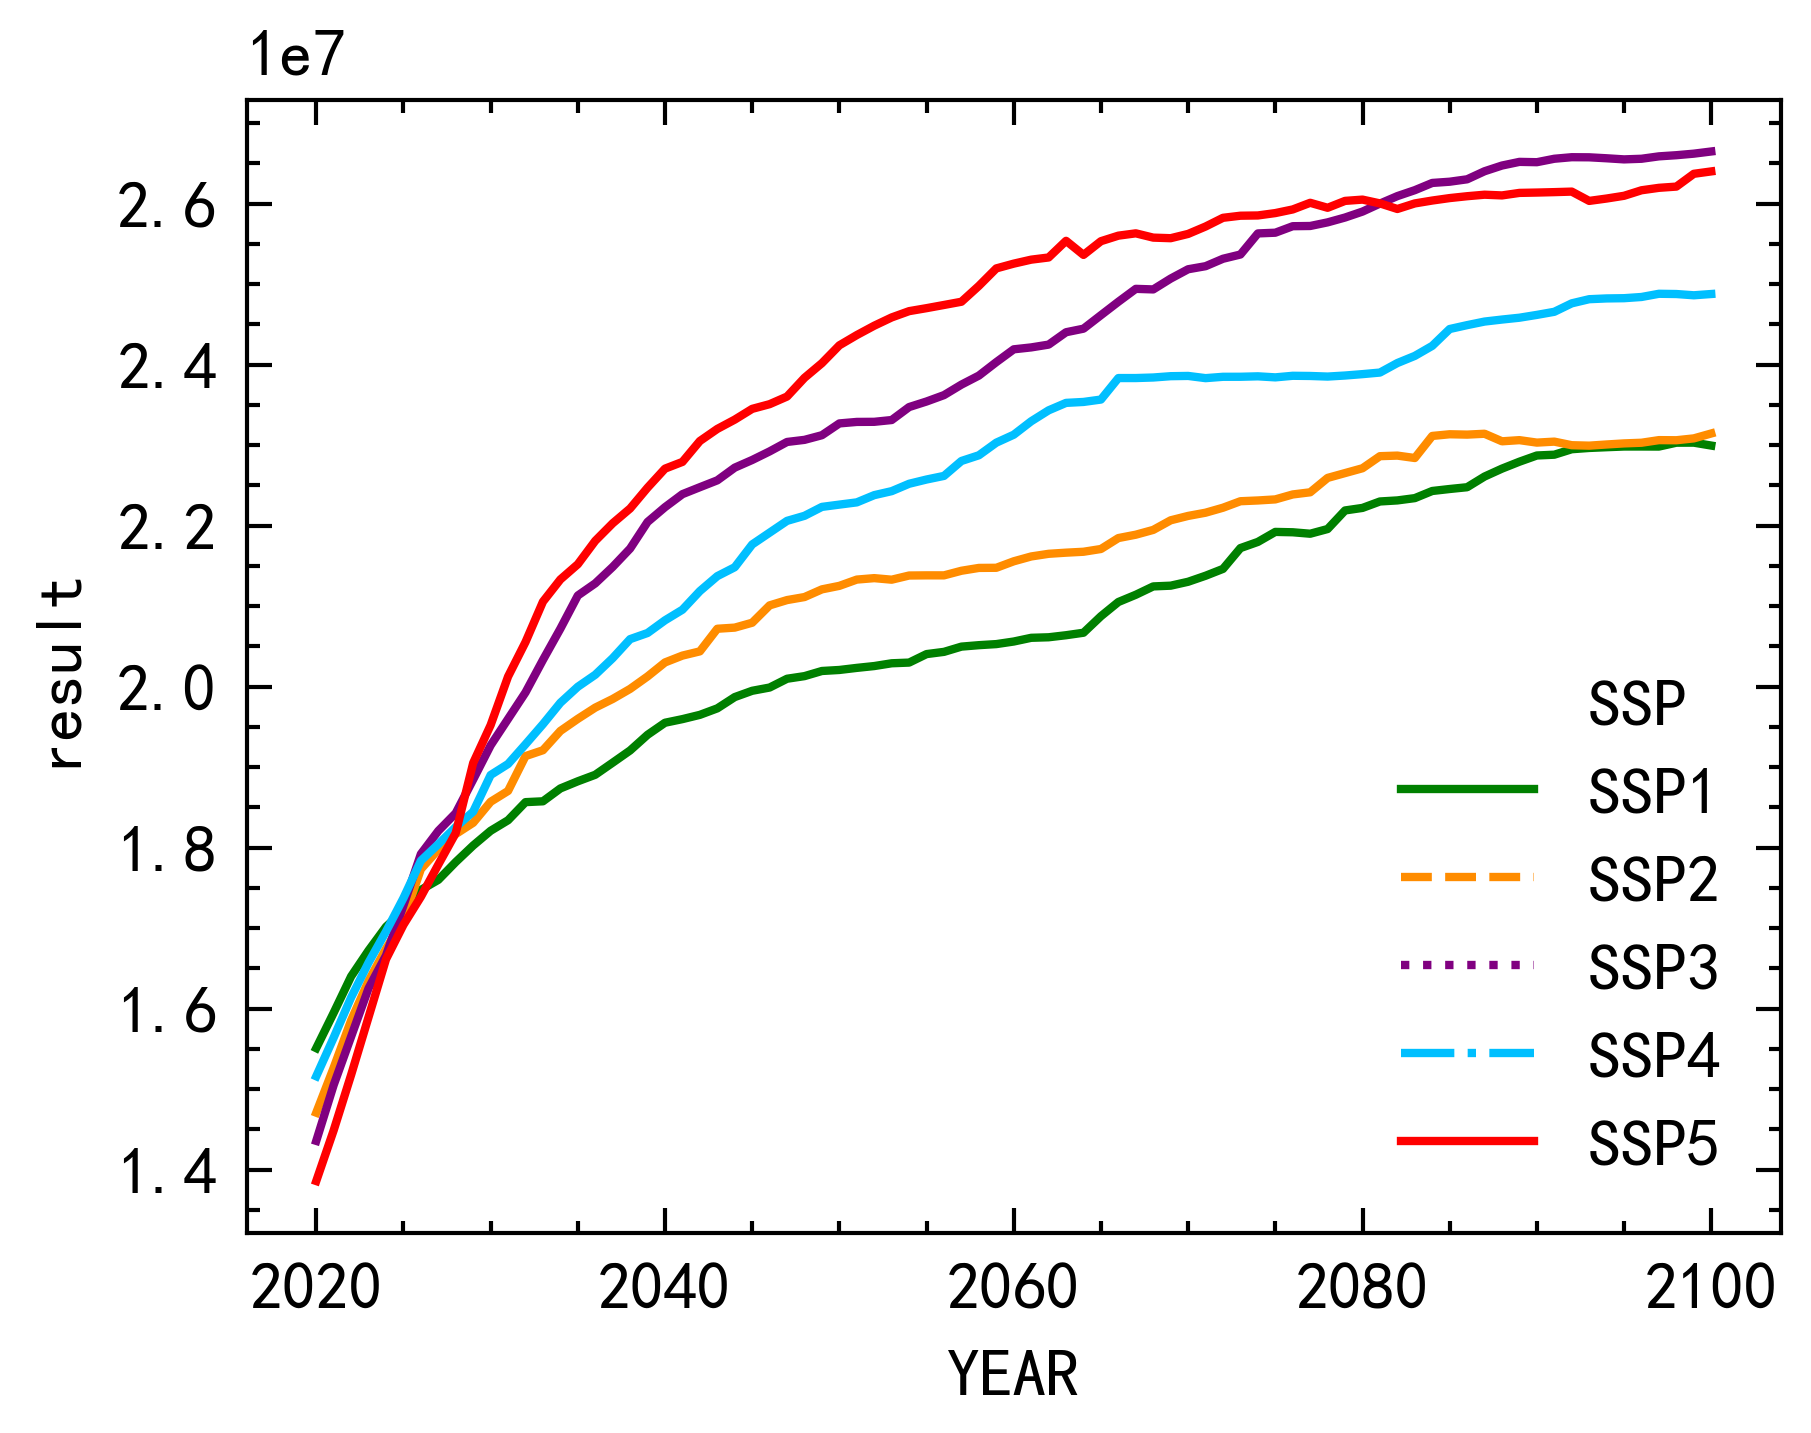

In [19]:
qg = predict_pro
qg['result'] = forest.predict(predict_pro[col])
qg_prediction = qg.groupby(['SSP','YEAR']).sum().reset_index()
sns.lineplot(x='YEAR', y='result', data=qg_prediction, hue='SSP', palette=["green", "darkorange", "purple",'deepskyblue','red'])

In [ ]:
train_pro_dna = train_pro.dropna()
train_pro_dna = train_pro_dna.drop(train_pro_dna[train_pro_dna.PROVINCE=='全国'].index)
X = train_pro_dna[col].values
Y = train_pro_dna.loc[:, 'SLUDGE'].values

x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.3,random_state=0)

#forest = GradientBoostingRegressor(n_estimators=4000,random_state=0)

forest = RandomForestRegressor(
         n_estimators=4000,
         random_state=0,
         n_jobs=-1)
forest.fit(x_train,y_train)

score_test = forest.score(x_test, y_test)
result_test = forest.predict(x_test)
print('训练精度：{}'.format(forest.score(x_train, y_train)))

predict_pro = pd.read_csv('最终预测集2.csv', encoding='utf-8')    
qg = predict_pro
qg['result'] = forest.predict(predict_pro[col])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


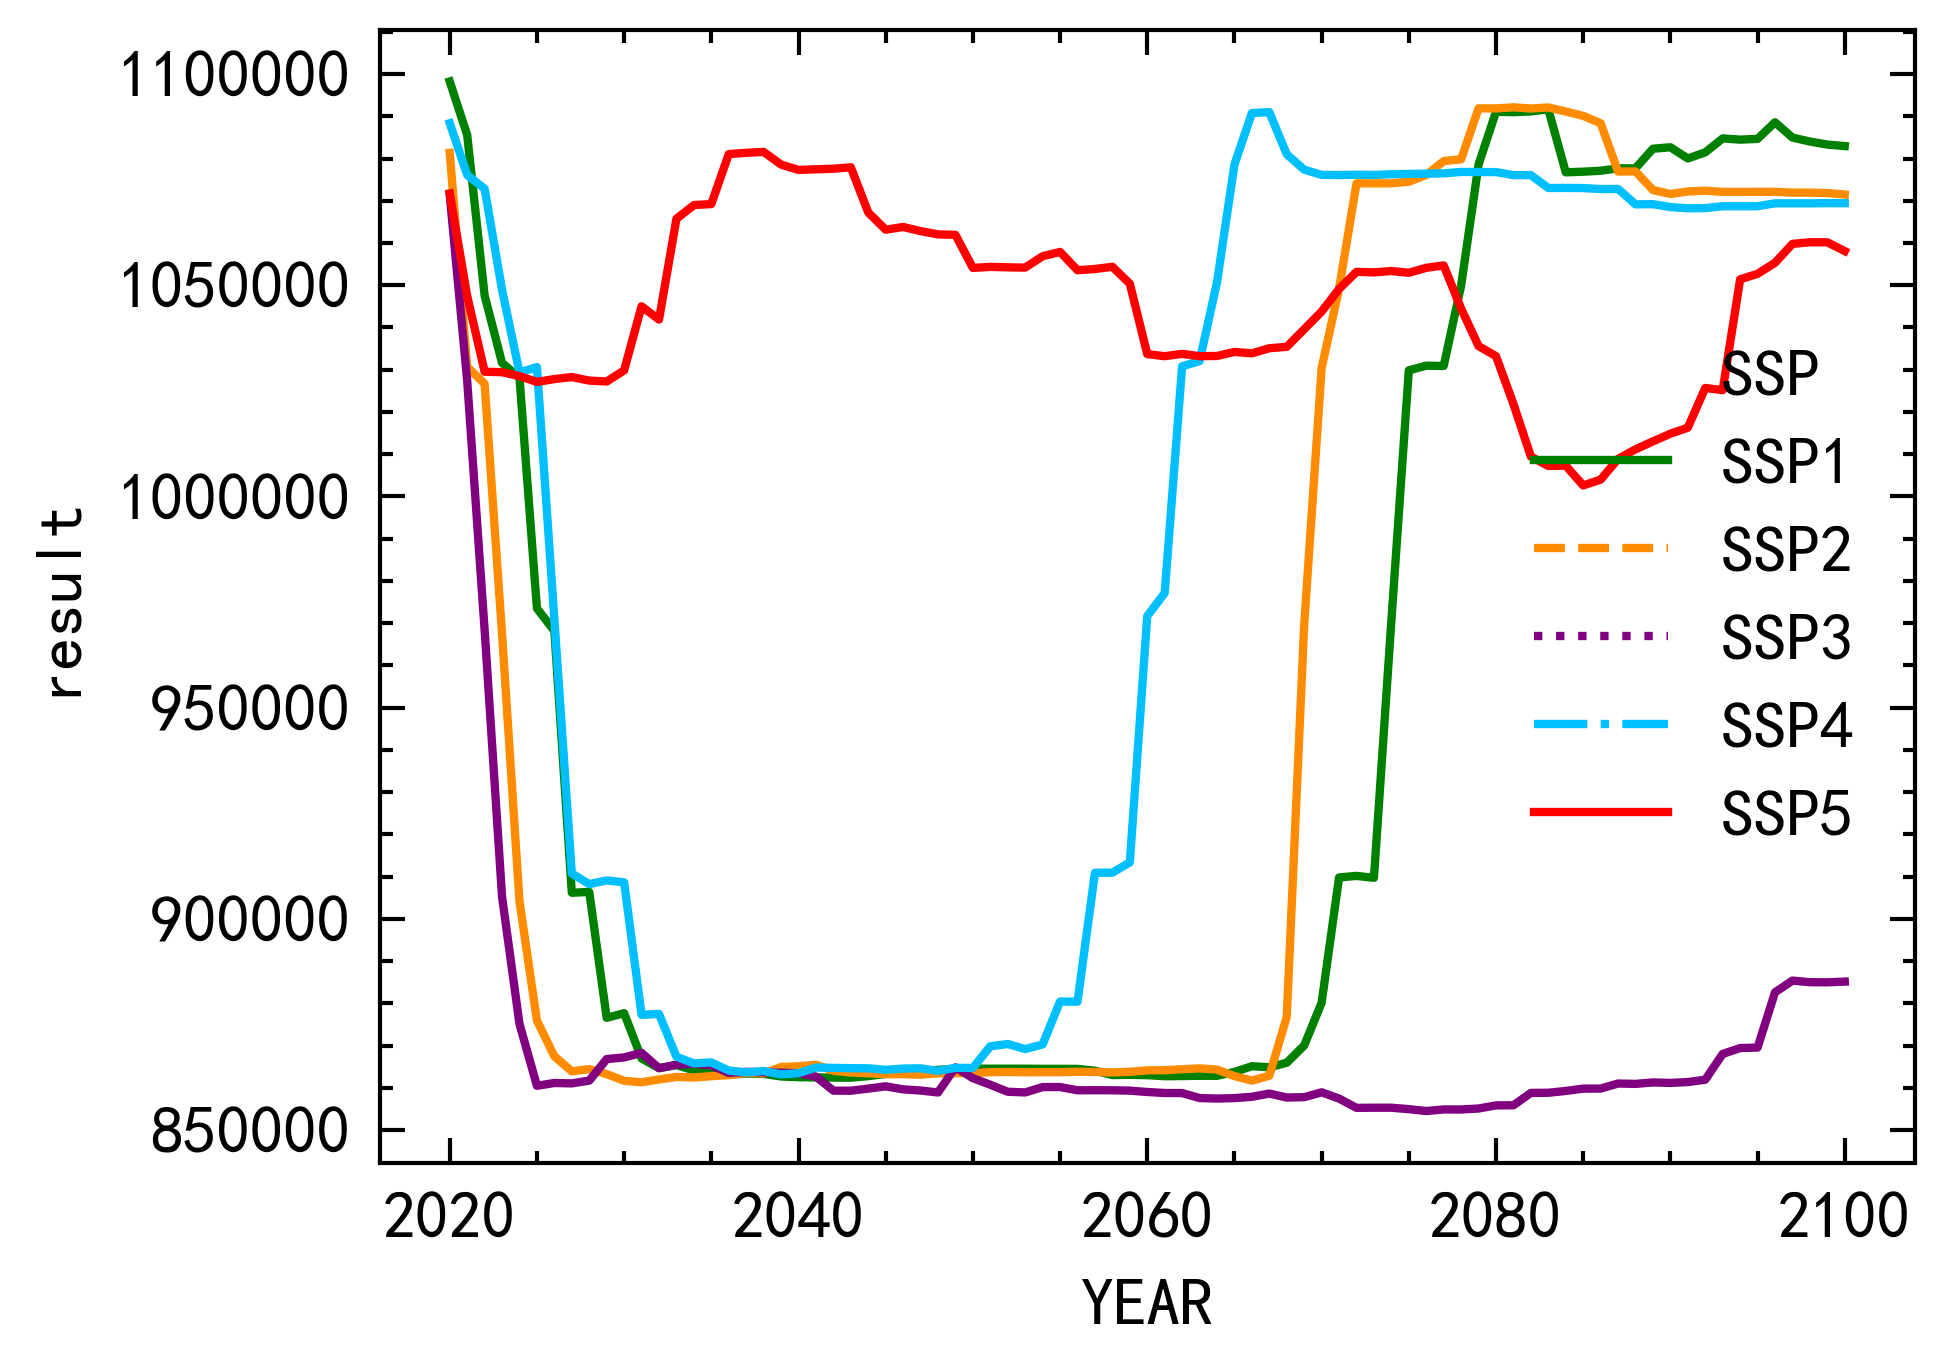

In [20]:
BJ = Rf_predict_pro(predict_pro, '北京市', col)
Rf_plot_pro(BJ)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


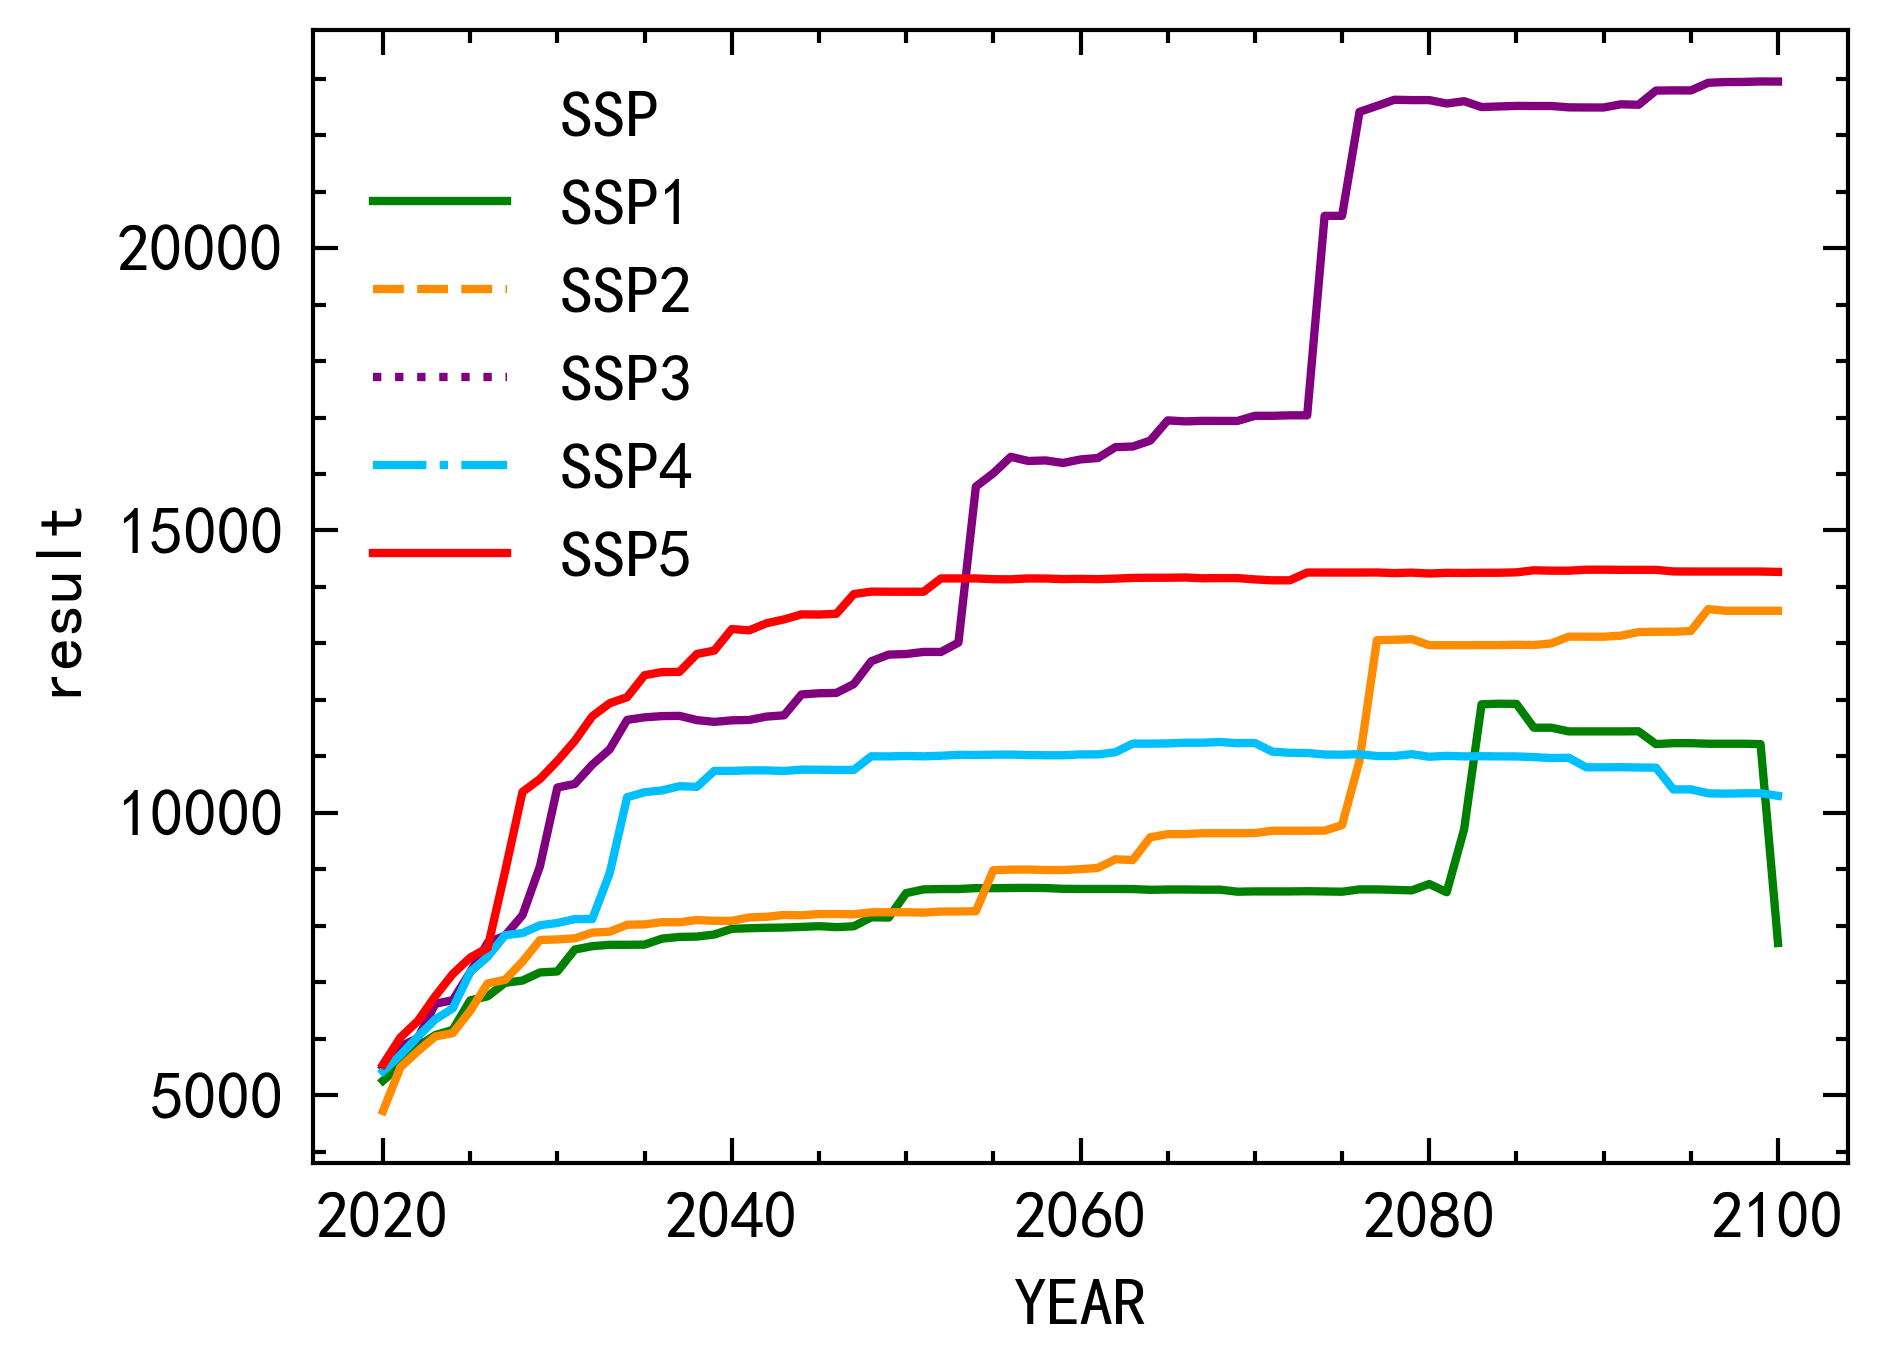

In [21]:
XZ = Rf_predict_pro(predict_pro, '西藏自治区', col)
Rf_plot_pro(XZ)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


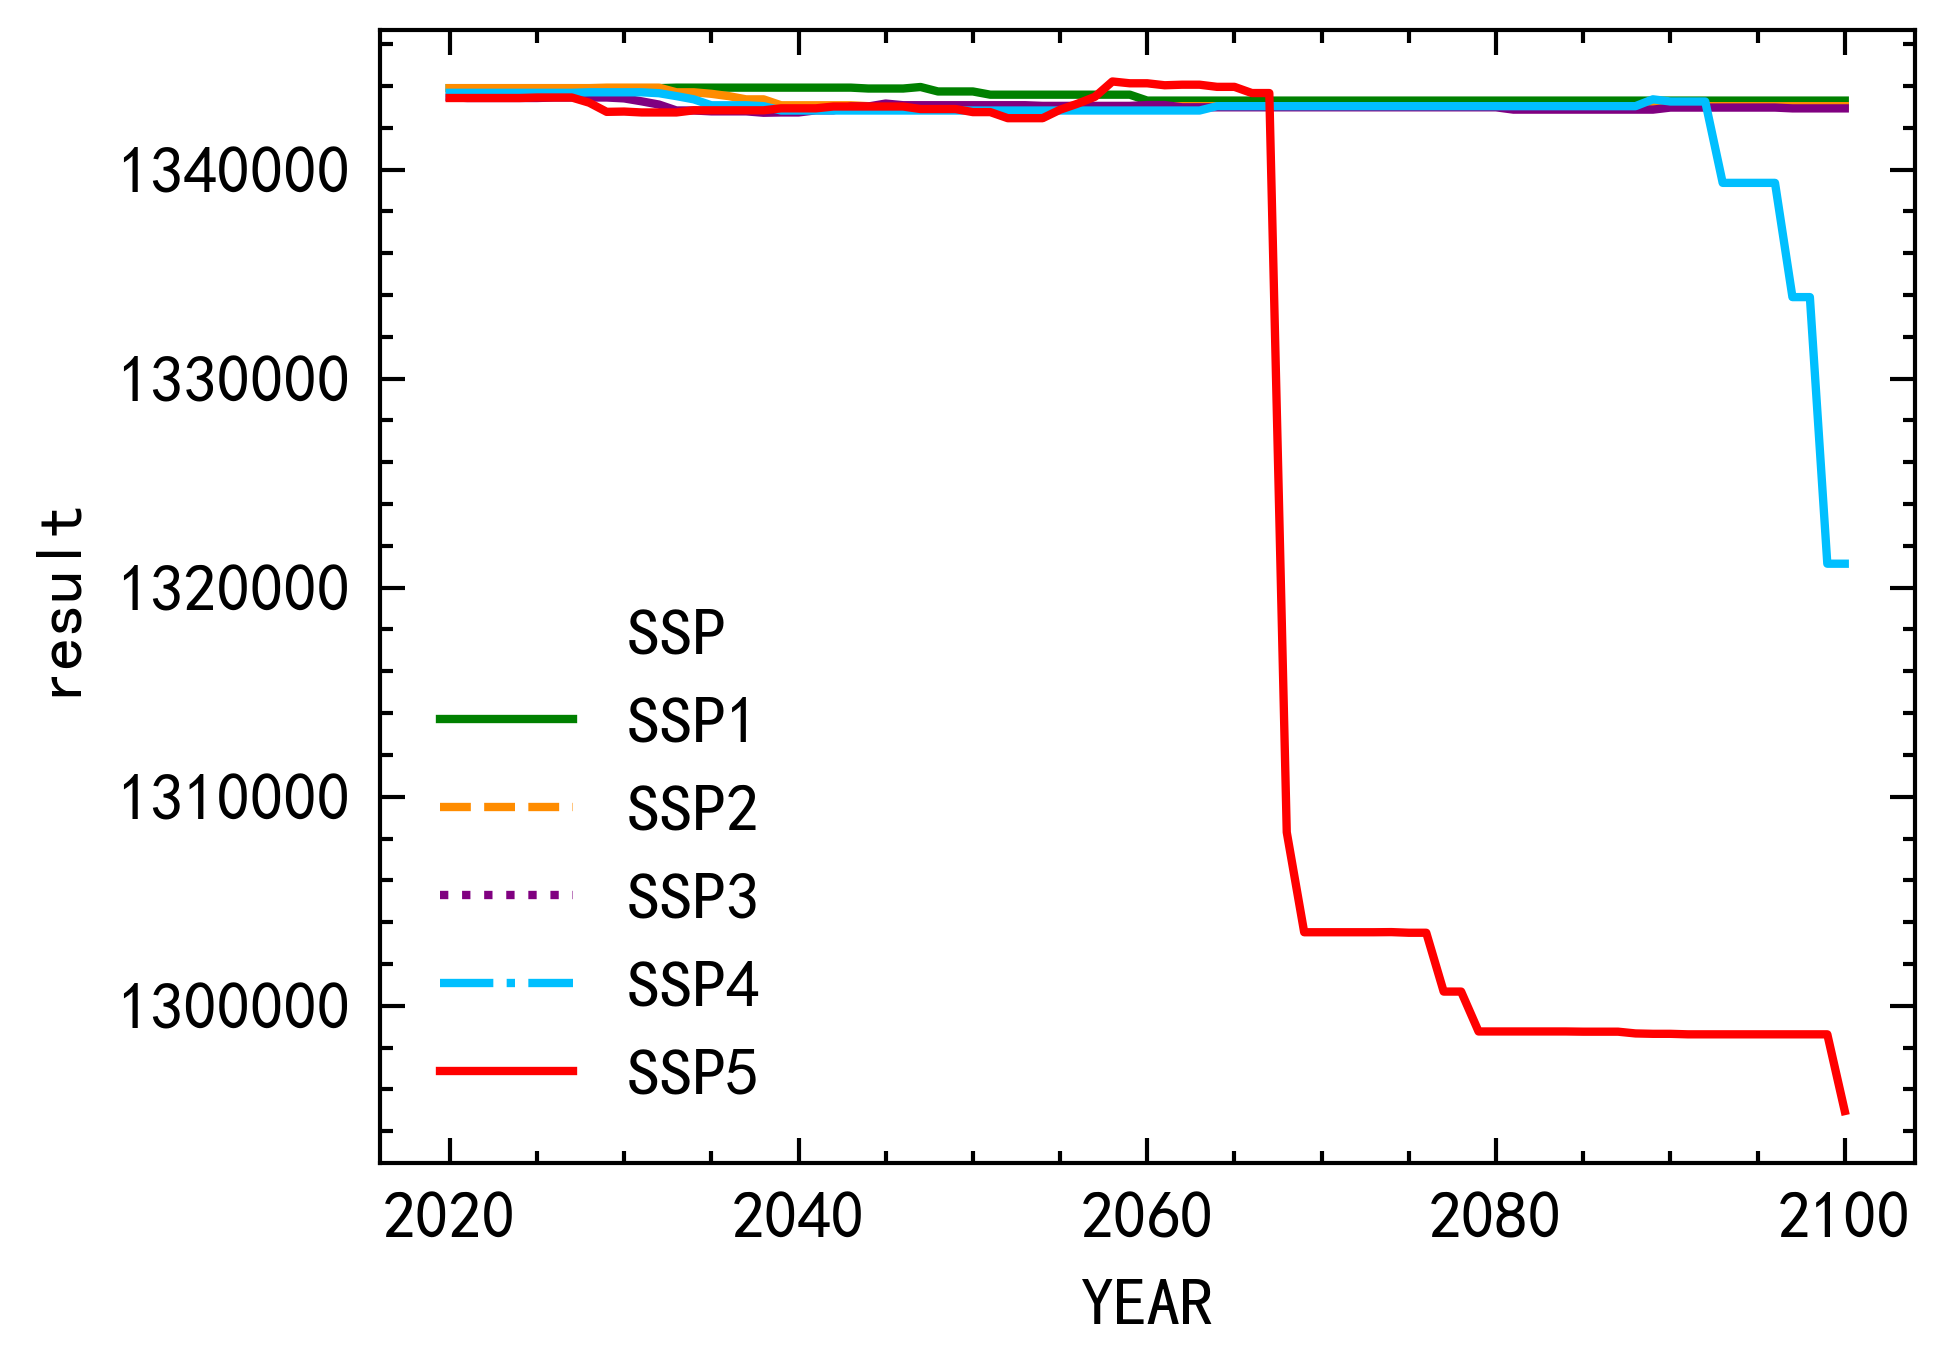

In [22]:
GD = Rf_predict_pro(predict_pro, '广东省', col)
Rf_plot_pro(GD)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


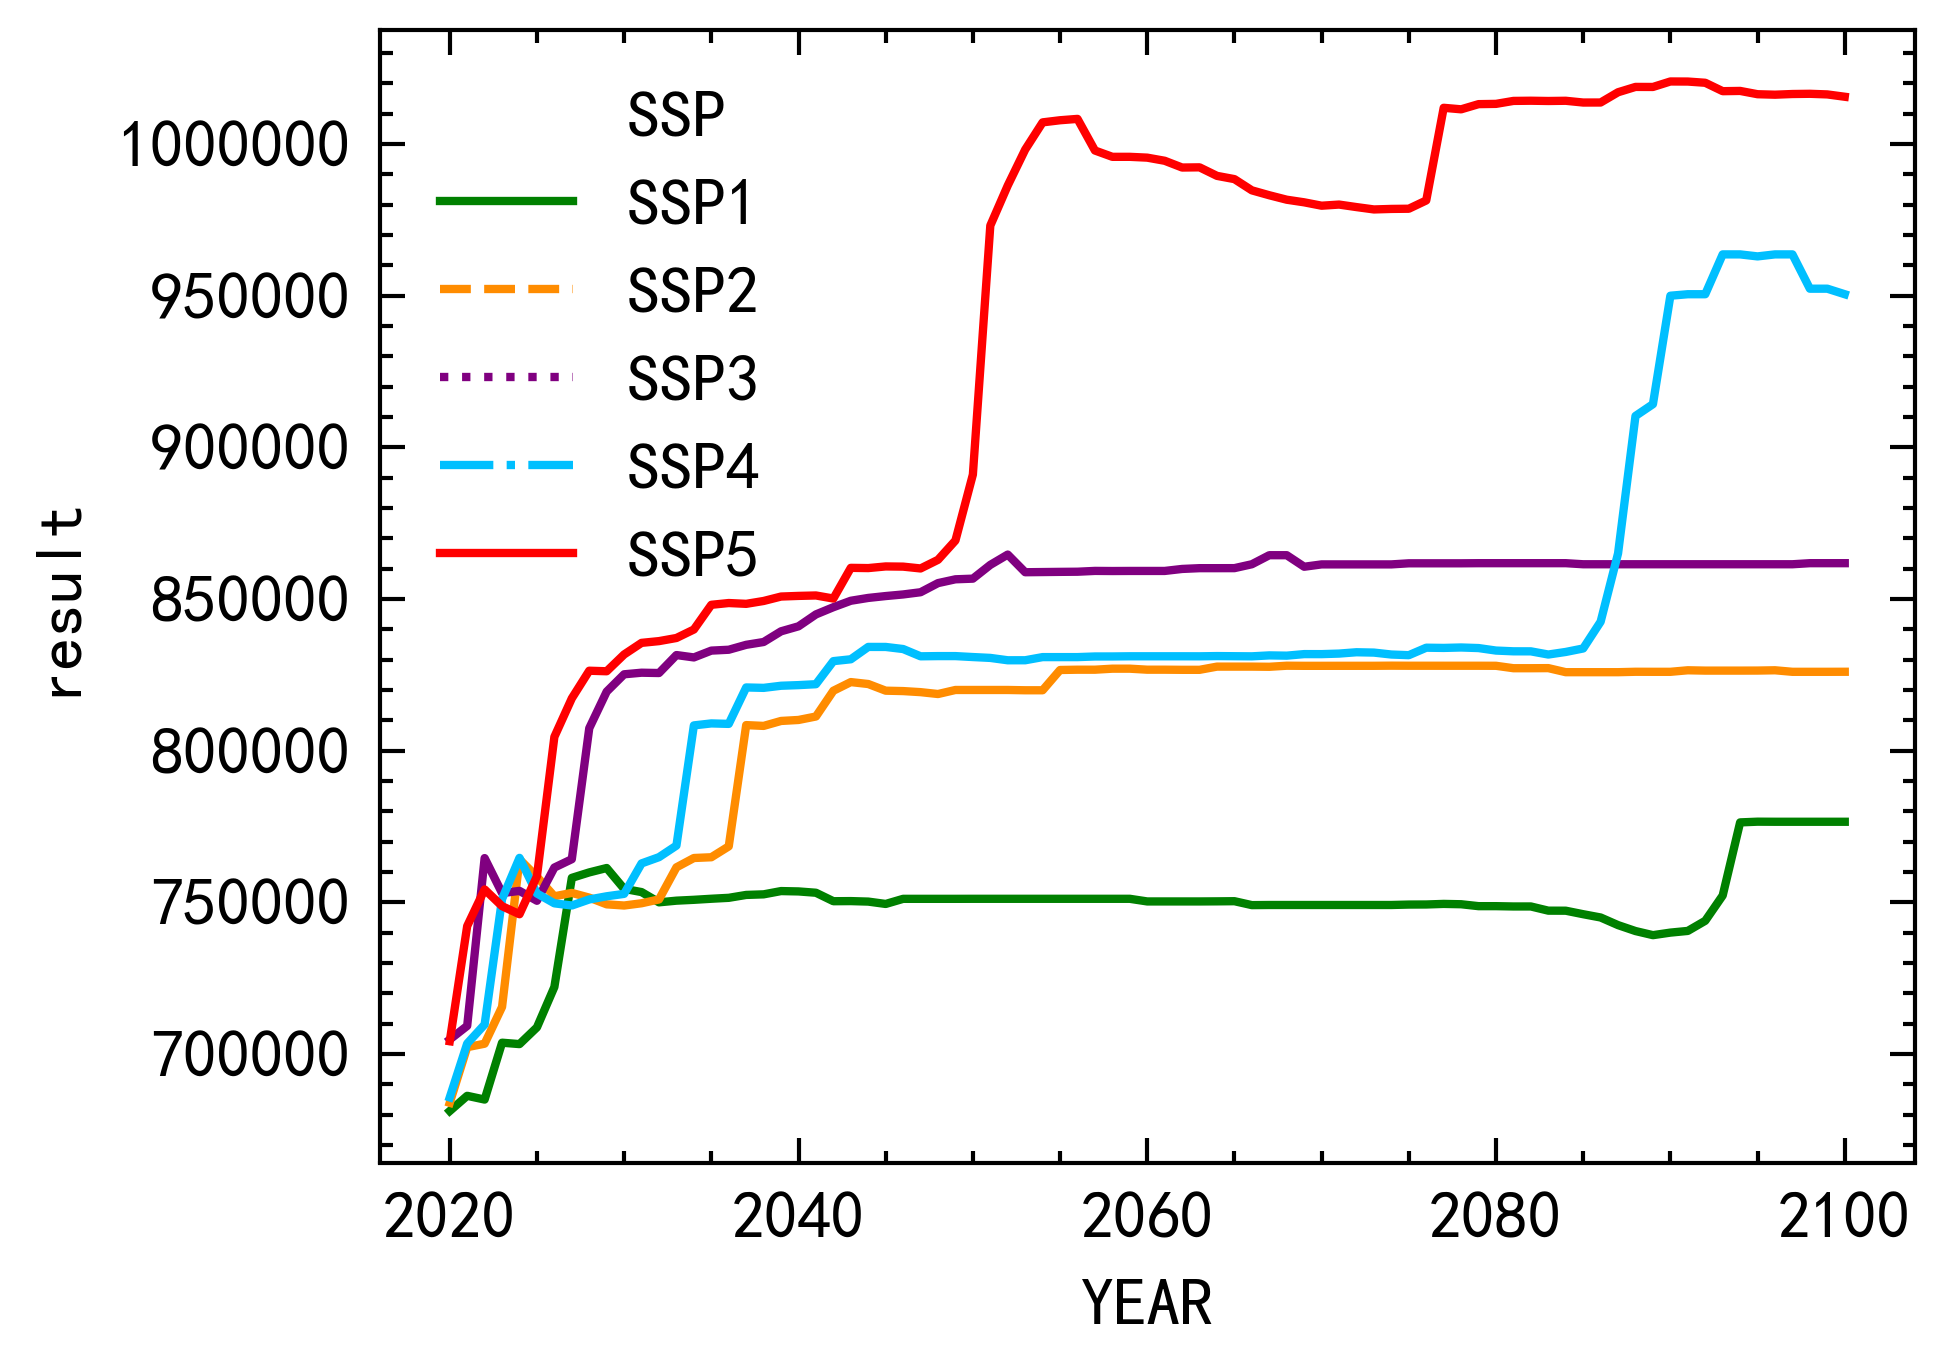

In [23]:
SH = Rf_predict_pro(predict_pro, '上海市', col)
Rf_plot_pro(SH)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


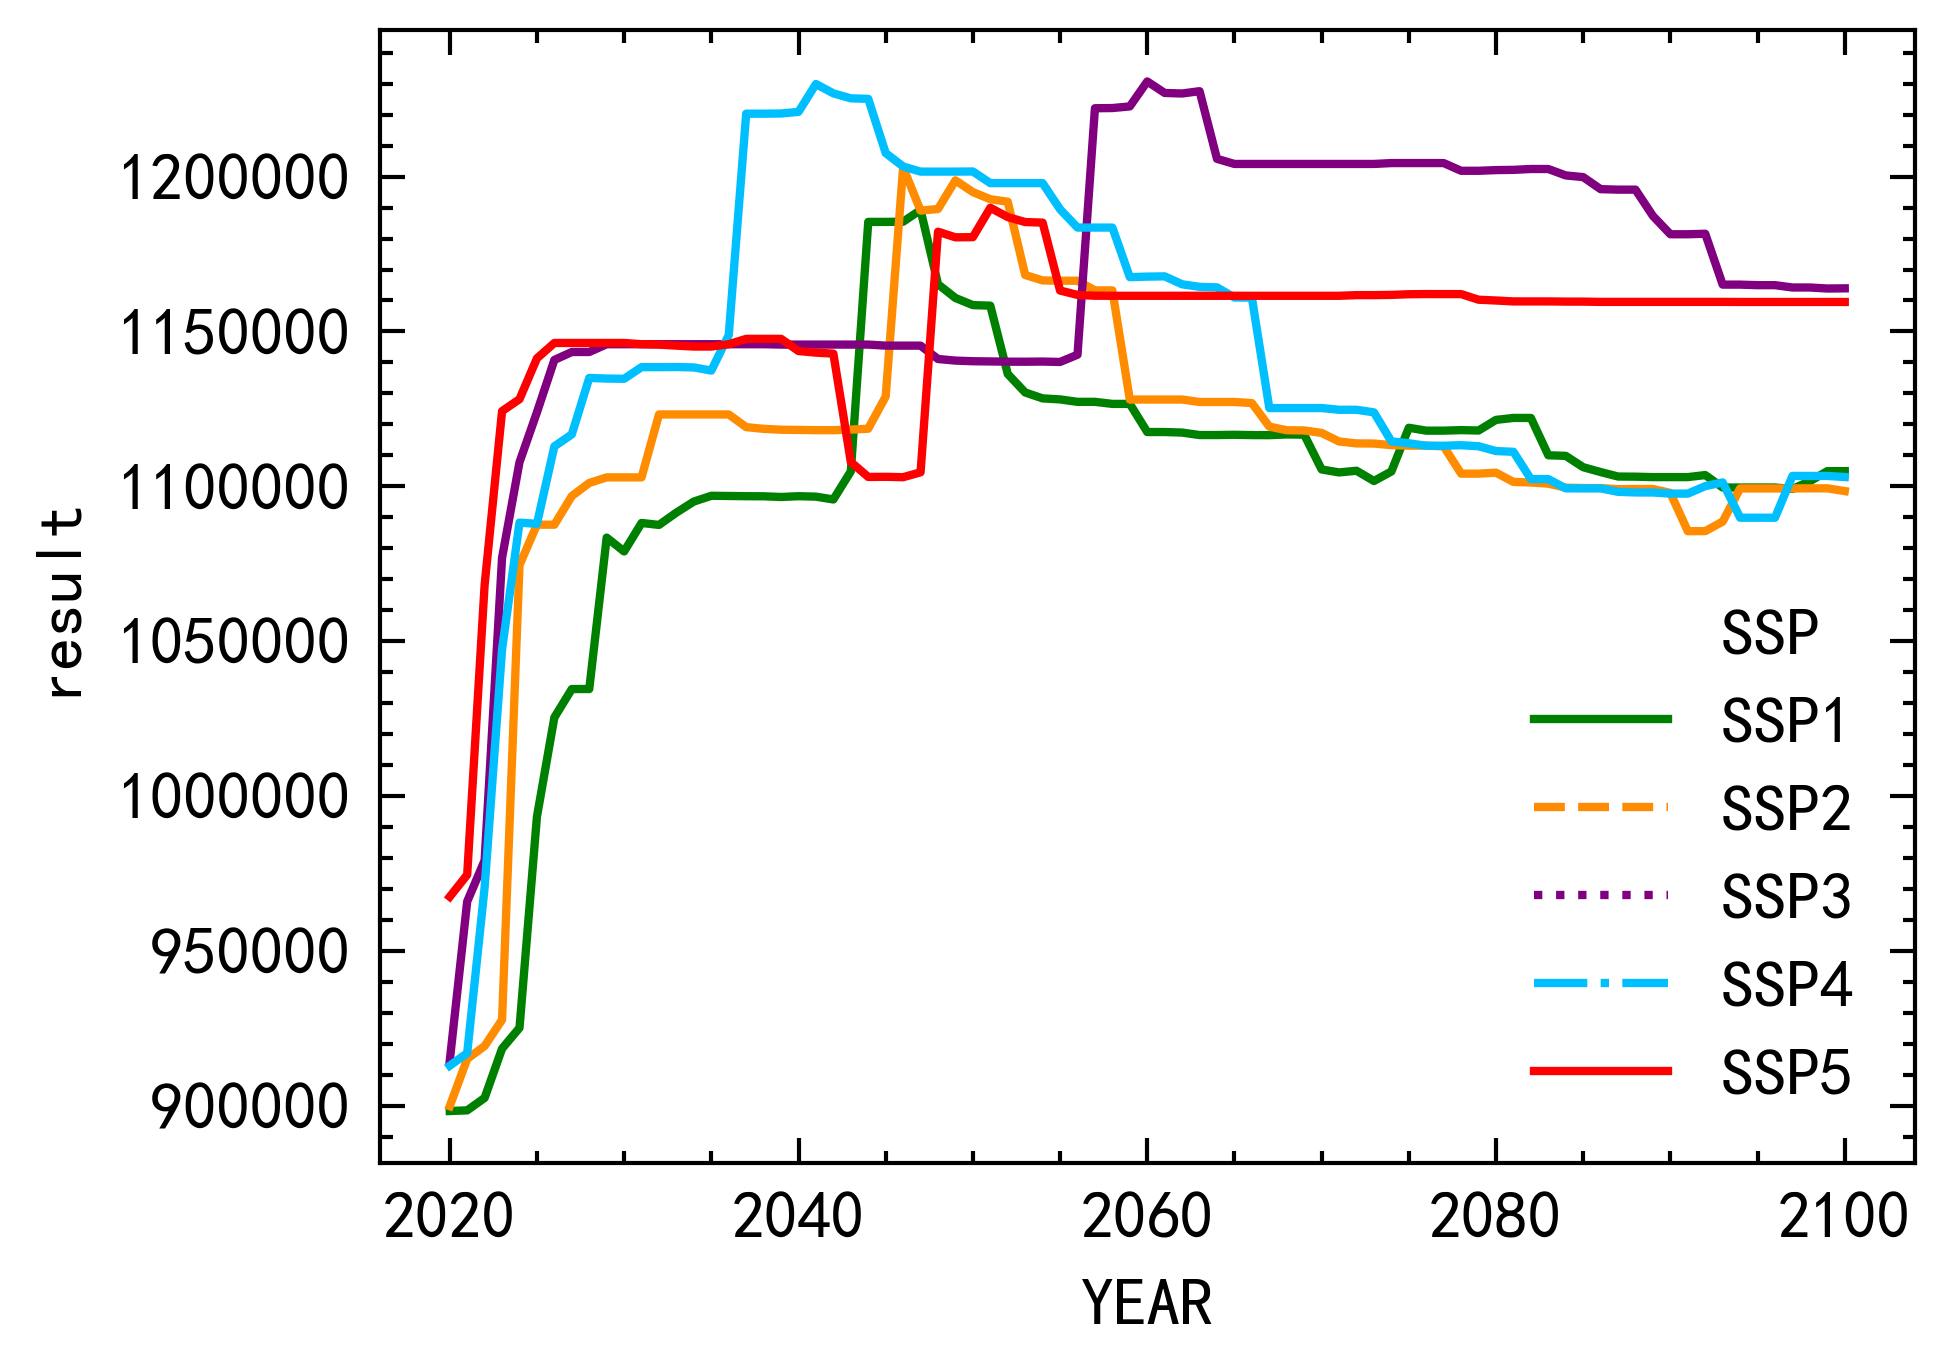

In [24]:
JS = Rf_predict_pro(predict_pro, '江苏省', col)
Rf_plot_pro(JS)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


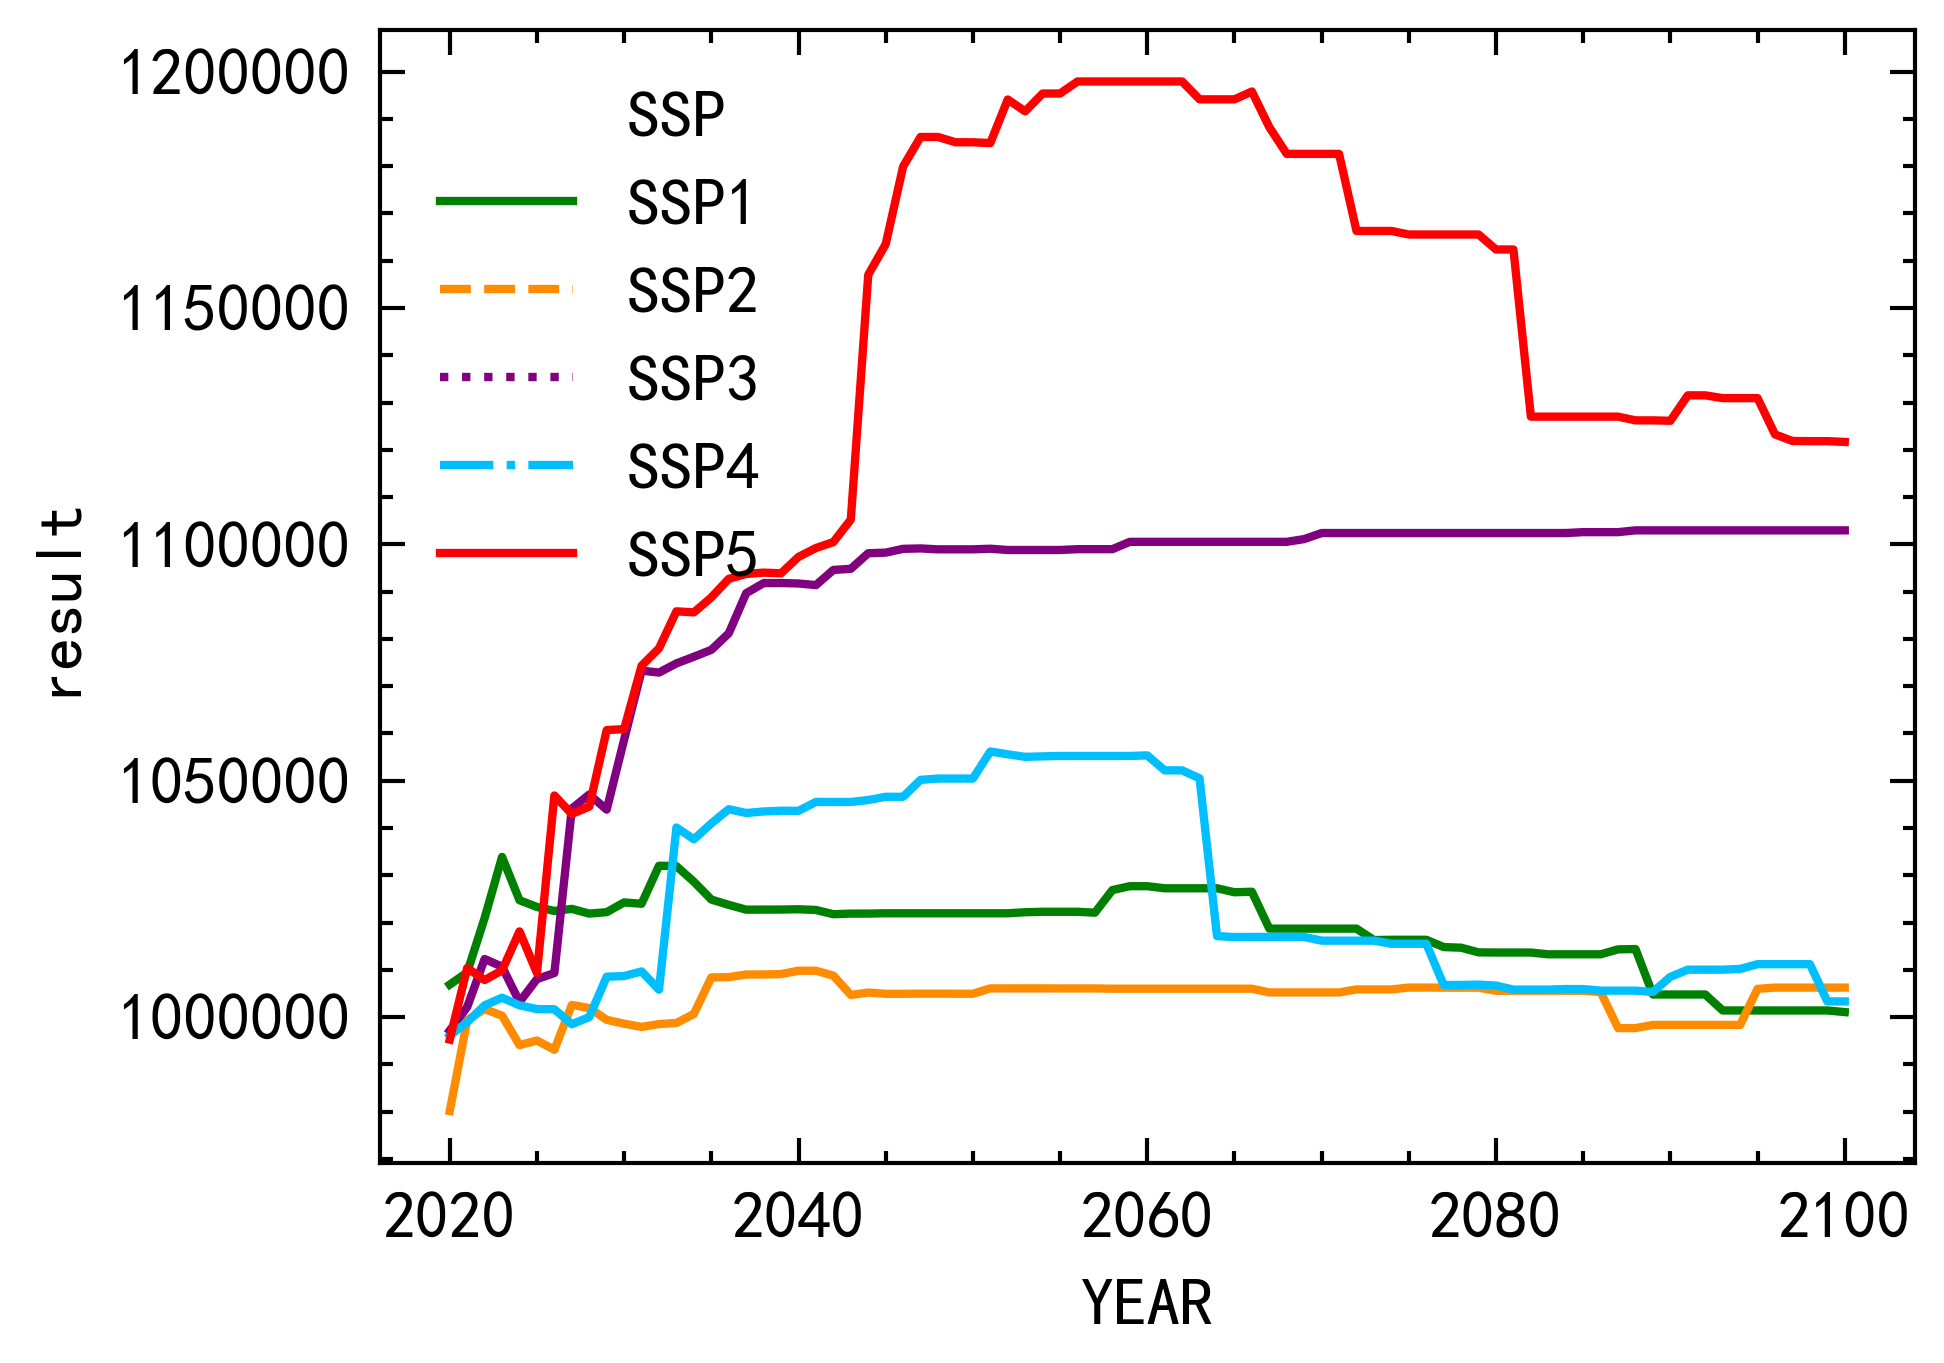

In [25]:
ZJ = Rf_predict_pro(predict_pro, '浙江省', col)
Rf_plot_pro(ZJ)

In [50]:
import os
data = pd.ExcelFile('region_pro.xlsx')
region_pro = data.parse('Sheet1')
region_pro

,Region,EPROVINCE,PROVINCE
0,ALL,China,全国
1,Eastern coastal region,Beijing,北京市
2,Eastern coastal region,Tianjin,天津市
3,Eastern coastal region,Hebei,河北省
4,Central region,Shanxi,山西省
5,Central region,Inner Mongolia,内蒙古自治区
6,Eastern coastal region,Liaoning,辽宁省
7,Central region,Jilin,吉林省
8,Central region,Heilongjiang,黑龙江省
9,Eastern coastal region,Shanghai,上海市


In [51]:
qg

,Unnamed: 0,Unnamed: 0.1,PROVINCE,SSP,YEAR,GDP,POP,CCF,人均CCF,BA,LDP,UR,FCE_P,FCE,result
0,0,0,安徽省,SSP1,2020,25098.66508,59553012,1.304211e+09,60,2230.975467,36771.85322,58.800889,8006.347021,2803.638621,5.461683e+05
1,1,1,安徽省,SSP1,2021,26341.53474,59541502,1.303959e+09,60,2283.182068,39286.51899,59.335686,8124.404538,2870.300020,5.571203e+05
2,2,2,安徽省,SSP1,2022,27563.63558,59499476,1.303039e+09,60,2331.820763,41743.54592,59.818215,8228.841386,2928.770084,5.931288e+05
3,3,3,安徽省,SSP1,2023,28751.04266,59429980,1.301517e+09,60,2376.956310,44118.42901,60.252794,8320.905125,2979.568302,6.241495e+05
4,4,4,安徽省,SSP1,2024,29889.35633,59336071,1.299460e+09,60,2418.687370,46390.03731,60.643549,8401.810736,3023.265526,6.412679e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12145,12145,12145,重庆市,SSP5,2096,36672.53796,28840746,1.052687e+09,100,3175.557942,45935.52443,87.368086,13447.085340,3388.343832,1.027268e+06
12146,12146,12146,重庆市,SSP5,2097,37055.60669,28852581,1.053119e+09,100,3175.655437,45935.55054,87.371285,13447.339260,3389.922359,1.029202e+06
12147,12147,12147,重庆市,SSP5,2098,37471.49491,28859111,1.053358e+09,100,3175.743218,45935.57269,87.374237,13447.569030,3390.862095,1.026464e+06
12148,12148,12148,重庆市,SSP5,2099,37922.15352,28859084,1.053357e+09,100,3175.822254,45935.59146,87.376963,13447.776930,3391.017130,1.025361e+06


In [54]:
qgg = pd.merge(qg, region_pro, on='PROVINCE', how='inner')

In [55]:
qgg.to_csv('final_result.csv', encoding='utf_8_sig')

In [7]:
from scipy.optimize import leastsq

import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [8]:
data_BA = pd.read_csv('BA.csv', encoding='utf-8')
data_BA.head()
data_LDP = pd.read_csv('LDP.csv', encoding='utf-8')
data_LDP.head()

,YEAR,全国,北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,...,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区
0,2002,173042.04,6169.6,8827.60,8363.55,2688.54,3560.53,8879.90,4466.48,5282.32,...,2671.06,7202.73,1904.10,2277.23,260.49,1940.32,2309.59,457.80,578.72,2261.02
1,2003,155286.25,6649.3,6372.97,6294.79,2254.08,2922.03,7502.99,3472.84,4282.48,...,2528.65,6232.10,1322.88,2055.04,220.19,2258.20,1729.82,464.04,476.70,1943.56
2,2004,218880.90,6790.3,9332.30,9575.03,3113.64,4031.89,9307.70,4817.01,5738.59,...,3752.46,8946.94,3183.74,2653.16,220.19,2919.25,2620.36,534.70,861.43,2940.29
3,2005,241056.00,6475.0,10889.00,10263.00,3352.00,4505.00,10519.00,5086.00,5918.00,...,4106.00,9656.00,3600.00,2952.00,279.00,3250.00,2722.00,554.00,956.00,2960.00
4,2006,261379.00,7523.0,11939.00,11359.00,4154.00,4779.00,10860.00,5608.00,6051.00,...,4897.00,10086.00,3045.00,3508.00,310.00,3947.00,2586.00,678.00,1051.00,3194.00


In [4]:
def logistic_prediction(df, province, r1):
    """
    logistic增长预测
    
    Args:
        df (DataFrame)：预测集
        r1 (float)：增长速率
        province (str)：省份名称
    Returns：
        future_predict (ndarray)：预测结果
        
    """
    def logistic_increase_function(t,K,P0,r):
        t0=1
        r=r1
        # t:time   t0:initial time    P0:initial_value    K:capacity  r:increase_rate
        exp_value=np.exp(r*(t-t0))
        return (K*exp_value*P0)/(K+(exp_value-1)*P0)

    P = df[province]
    
    t = np.arange(1, 19, 1)
    
    popt, pcov = curve_fit(logistic_increase_function, t, P)
    P_predict = logistic_increase_function(t,popt[0], popt[1], popt[2])
    future=np.arange(1, 100, 1)
    future_predict=logistic_increase_function(future, popt[0], popt[1], popt[2])
    return future_predict

def draw_logistic_prediction(df, province, r_ssp1, r_ssp2, r_ssp3, r_ssp4, r_ssp5):
    plt.figure()
    plt.plot(np.arange(2002,2020,1), df[province])
    plt.plot(np.arange(2020,2101,1), logistic_prediction(df, province, r_ssp1)[18:], label='SSP1', color='green')
    plt.plot(np.arange(2020,2101,1), logistic_prediction(df, province, r_ssp2)[18:], label='SSP2', color='darkorange')
    plt.plot(np.arange(2020,2101,1), logistic_prediction(df, province, r_ssp3)[18:], label='SSP3', color='purple')
    plt.plot(np.arange(2020,2101,1), logistic_prediction(df, province, r_ssp4)[18:], label='SSP4', color='deepskyblue')
    plt.plot(np.arange(2020,2101,1), logistic_prediction(df, province, r_ssp5)[18:], label='SSP5', color='red')
    plt.legend()

In [5]:
def save_results(df, province, r_ssp1, r_ssp2, r_ssp3, r_ssp4, r_ssp5):
    dic = {}
    dic['SSP1'] = logistic_prediction(df, province, r_ssp1)[18:]
    dic['SSP2'] = logistic_prediction(df, province, r_ssp2)[18:]
    dic['SSP3'] = logistic_prediction(df, province, r_ssp3)[18:]
    dic['SSP4'] = logistic_prediction(df, province, r_ssp4)[18:]
    dic['SSP5'] = logistic_prediction(df, province, r_ssp5)[18:]
    dic['PROVINCE'] = [province] * len(dic['SSP5'])
    dic['YEAR'] = np.arange(2020,2101,1)
    DF = pd.DataFrame(dic).melt(id_vars=['YEAR','PROVINCE']).rename(columns={'variable':'SSP'})
    return DF

In [15]:


Beijing_BA = save_results(data_BA, '北京市', 0.05, 0.03, 0.028, 0.04, 0.01)
Beijing_LDP = save_results(data_LDP, '北京市',0.175, 0.150, 0.125, 0.165, 0.12)

Tianjin_BA = save_results(data_BA, '天津市', 0.115, 0.09, 0.085, 0.095, 0.08)
Tianjin_LDP = save_results(data_LDP, '天津市',0.175, 0.150, 0.125, 0.165, 0.12)

Hebei_BA = save_results(data_BA, '河北省', 0.115, 0.09, 0.07, 0.095, 0.06)
Hebei_LDP = save_results(data_LDP, '河北省',0.175, 0.140, 0.11, 0.145, 0.09)

Shanxi_BA = save_results(data_BA, '山西省', 0.115, 0.09, 0.07, 0.095, 0.06)
Shanxi_LDP = save_results(data_LDP, '山西省',0.115, 0.10, 0.095, 0.104, 0.09)

Neimenggu_BA = save_results(data_BA, '内蒙古自治区', 0.115, 0.09, 0.07, 0.095, 0.06)
Neimenggu_LDP = save_results(data_LDP, '内蒙古自治区',0.115, 0.10, 0.095, 0.104, 0.09)

Liaoning_BA = save_results(data_BA, '辽宁省', 0.115, 0.09, 0.07, 0.095, 0.06)
Liaoning_LDP = save_results(data_LDP, '辽宁省',0.115, 0.10, 0.095, 0.104, 0.09)

Jilin_BA = save_results(data_BA, '吉林省', 0.115, 0.09, 0.07, 0.095, 0.06)
Jilin_LDP = save_results(data_LDP, '吉林省',0.115, 0.10, 0.095, 0.104, 0.09)

Heilongjiang_BA = save_results(data_BA, '黑龙江省', 0.115, 0.09, 0.07, 0.095, 0.06)
Heilongjiang_LDP = save_results(data_LDP, '黑龙江省',0.115, 0.10, 0.095, 0.104, 0.09)

Shanghai_BA = save_results(data_BA, '上海市', 0.115, 0.09, 0.07, 0.095, 0.06)
Shanghai_LDP = save_results(data_LDP, '上海市',0.15, 0.13, 0.12, 0.14, 0.11)

Jiangsu_BA = save_results(data_BA, '江苏省', 0.115, 0.095, 0.09, 0.10, 0.08)
Jiangsu_LDP = save_results(data_LDP, '江苏省',0.15, 0.13, 0.12, 0.14, 0.115)

Zhejiang_BA = save_results(data_BA, '浙江省', 0.115, 0.09, 0.08, 0.095, 0.07)
Zhejiang_LDP = save_results(data_LDP, '浙江省',0.15, 0.13, 0.12, 0.14, 0.11)

Anhui_BA = save_results(data_BA, '安徽省', 0.115, 0.09, 0.08, 0.095, 0.07)
Anhui_LDP = save_results(data_LDP, '安徽省',0.15, 0.135, 0.13, 0.14, 0.128)

Fujian_BA = save_results(data_BA, '福建省', 0.115, 0.09, 0.083, 0.095, 0.081)
Fujian_LDP = save_results(data_LDP, '福建省',0.15, 0.13, 0.12, 0.14, 0.11)

Jiangxi_BA = save_results(data_BA, '江西省', 0.115, 0.095, 0.09, 0.10, 0.087)
Jiangxi_LDP = save_results(data_LDP, '江西省',0.165, 0.152, 0.148, 0.158, 0.145)

Shandong_BA = save_results(data_BA, '山东省', 0.115, 0.09, 0.085, 0.095, 0.08)
Shandong_LDP = save_results(data_LDP, '山东省',0.175, 0.150, 0.125, 0.165, 0.12)

Henan_BA = save_results(data_BA, '河南省', 0.115, 0.09, 0.085, 0.095, 0.08)
Henan_LDP = save_results(data_LDP, '河南省',0.135, 0.125, 0.120, 0.130, 0.115)

Hubei_BA = save_results(data_BA, '湖北省', 0.100, 0.080, 0.075, 0.085, 0.070)
Hubei_LDP = save_results(data_LDP, '湖北省',0.175, 0.150, 0.125, 0.165, 0.12)

Hunan_BA = save_results(data_BA, '湖南省', 0.100, 0.080, 0.075, 0.085, 0.070)
Hunan_LDP = save_results(data_LDP, '湖南省',0.165, 0.140, 0.125, 0.155, 0.12)

Guangdong_BA = save_results(data_BA, '广东省', 0.100, 0.080, 0.075, 0.085, 0.070)
Guangdong_LDP = save_results(data_LDP, '广东省',0.145, 0.140, 0.125, 0.143, 0.12)

Guangxi_BA = save_results(data_BA, '广西壮族自治区', 0.100, 0.080, 0.075, 0.085, 0.070)
Guangxi_LDP = save_results(data_LDP, '广西壮族自治区',0.145, 0.140, 0.135, 0.143, 0.130)

Hainan_BA = save_results(data_BA, '海南省', 0.100, 0.080, 0.075, 0.085, 0.070)
Hainan_LDP = save_results(data_LDP, '海南省',0.125, 0.110, 0.105, 0.115, 0.100) 

Chongqing_BA = save_results(data_BA, '重庆市', 0.150, 0.130, 0.120, 0.140, 0.105)
Chongqing_LDP = save_results(data_LDP, '重庆市',0.185, 0.175, 0.170, 0.180, 0.165)

Sichuan_BA = save_results(data_BA, '四川省', 0.145, 0.125, 0.115, 0.135, 0.100)
Sichuan_LDP = save_results(data_LDP, '四川省',0.180, 0.170, 0.165, 0.175, 0.150)

Guizhou_BA = save_results(data_BA, '贵州省', 0.145, 0.130, 0.120, 0.140, 0.115)
Guizhou_LDP = save_results(data_LDP, '贵州省',0.160, 0.145, 0.135, 0.155, 0.128)

Yunnan_BA = save_results(data_BA, '云南省', 0.145, 0.130, 0.120, 0.140, 0.115)
Yunnan_LDP = save_results(data_LDP, '云南省',0.195, 0.185, 0.180, 0.190, 0.175)

Xizang_BA = save_results(data_BA, '西藏自治区', 0.145, 0.130, 0.120, 0.140, 0.115)
Xizang_LDP = save_results(data_LDP, '西藏自治区',0.160, 0.145, 0.135, 0.155, 0.128)

Shaanxi_BA = save_results(data_BA, '陕西省', 0.145, 0.130, 0.120, 0.140, 0.115)
Shaanxi_LDP = save_results(data_LDP, '陕西省',0.160, 0.145, 0.135, 0.155, 0.128)

Gansu_BA = save_results(data_BA, '甘肃省', 0.125, 0.090, 0.080, 0.100, 0.075)
Gansu_LDP = save_results(data_LDP, '甘肃省',0.160, 0.145, 0.135, 0.155, 0.128)

Qinghai_BA = save_results(data_BA, '青海省', 0.125, 0.090, 0.080, 0.100, 0.075)
Qinghai_LDP = save_results(data_LDP, '青海省',0.160, 0.145, 0.140, 0.155, 0.135)

Ningxia_BA = save_results(data_BA, '宁夏回族自治区', 0.125, 0.090, 0.080, 0.100, 0.075)
Ningxia_LDP = save_results(data_LDP, '宁夏回族自治区',0.125, 0.090, 0.080, 0.100, 0.075)

Xinjiang_BA = save_results(data_BA, '新疆维吾尔自治区', 0.125, 0.090, 0.080, 0.100, 0.075)
Xinjiang_LDP = save_results(data_LDP, '新疆维吾尔自治区',0.130, 0.115, 0.110, 0.125, 0.105)



D:\Anaconda\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [7]:
draw_logistic_prediction(data_BA, '天津市', 0.115, 0.09, 0.085, 0.095, 0.08)
draw_logistic_prediction(data_LDP, '天津市',0.175, 0.150, 0.125, 0.165, 0.12)

draw_logistic_prediction(data_BA, '河北省', 0.115, 0.09, 0.07, 0.095, 0.06)
draw_logistic_prediction(data_LDP, '河北省',0.175, 0.140, 0.11, 0.145, 0.09)

draw_logistic_prediction(data_BA, '山西省', 0.115, 0.09, 0.07, 0.095, 0.06)
draw_logistic_prediction(data_LDP, '山西省',0.115, 0.10, 0.095, 0.104, 0.09)

draw_logistic_prediction(data_BA, '内蒙古自治区', 0.115, 0.09, 0.07, 0.095, 0.06)
draw_logistic_prediction(data_LDP, '内蒙古自治区',0.115, 0.10, 0.095, 0.104, 0.09)

draw_logistic_prediction(data_BA, '辽宁省', 0.115, 0.09, 0.07, 0.095, 0.06)
draw_logistic_prediction(data_LDP, '辽宁省',0.115, 0.10, 0.095, 0.104, 0.09)

draw_logistic_prediction(data_BA, '吉林省', 0.115, 0.09, 0.07, 0.095, 0.06)
draw_logistic_prediction(data_LDP, '吉林省',0.115, 0.10, 0.095, 0.104, 0.09)

draw_logistic_prediction(data_BA, '黑龙江省', 0.115, 0.09, 0.07, 0.095, 0.06)
draw_logistic_prediction(data_LDP, '黑龙江省',0.115, 0.10, 0.095, 0.104, 0.09)

draw_logistic_prediction(data_BA, '上海市', 0.115, 0.09, 0.07, 0.095, 0.06)
draw_logistic_prediction(data_LDP, '上海市',0.15, 0.13, 0.12, 0.14, 0.11)

draw_logistic_prediction(data_BA, '江苏省', 0.115, 0.095, 0.09, 0.10, 0.08)
draw_logistic_prediction(data_LDP, '江苏省',0.15, 0.13, 0.12, 0.14, 0.115)

draw_logistic_prediction(data_BA, '浙江省', 0.115, 0.09, 0.08, 0.095, 0.07)
draw_logistic_prediction(data_LDP, '浙江省',0.15, 0.13, 0.12, 0.14, 0.11)

draw_logistic_prediction(data_BA, '安徽省', 0.115, 0.09, 0.08, 0.095, 0.07)
draw_logistic_prediction(data_LDP, '安徽省',0.15, 0.135, 0.13, 0.14, 0.128)

draw_logistic_prediction(data_BA, '福建省', 0.115, 0.09, 0.083, 0.095, 0.081)
draw_logistic_prediction(data_LDP, '福建省',0.15, 0.13, 0.12, 0.14, 0.11)

draw_logistic_prediction(data_BA, '江西省', 0.115, 0.095, 0.09, 0.10, 0.087)
draw_logistic_prediction(data_LDP, '江西省',0.165, 0.152, 0.148, 0.158, 0.145)

draw_logistic_prediction(data_BA, '山东省', 0.115, 0.09, 0.085, 0.095, 0.08)
draw_logistic_prediction(data_LDP, '山东省',0.175, 0.150, 0.125, 0.165, 0.12)

draw_logistic_prediction(data_BA, '河南省', 0.115, 0.09, 0.085, 0.095, 0.08)
draw_logistic_prediction(data_LDP, '河南省',0.135, 0.125, 0.120, 0.130, 0.115)

draw_logistic_prediction(data_BA, '湖北省', 0.100, 0.080, 0.075, 0.085, 0.070)
draw_logistic_prediction(data_LDP, '湖北省',0.175, 0.150, 0.125, 0.165, 0.12)

draw_logistic_prediction(data_BA, '湖南省', 0.100, 0.080, 0.075, 0.085, 0.070)
draw_logistic_prediction(data_LDP, '湖南省',0.165, 0.140, 0.125, 0.155, 0.12)

draw_logistic_prediction(data_BA, '广东省', 0.100, 0.080, 0.075, 0.085, 0.070)
draw_logistic_prediction(data_LDP, '广东省',0.145, 0.140, 0.125, 0.143, 0.12)

draw_logistic_prediction(data_BA, '广西壮族自治区', 0.100, 0.080, 0.075, 0.085, 0.070)
draw_logistic_prediction(data_LDP, '广西壮族自治区',0.145, 0.140, 0.135, 0.143, 0.130)

draw_logistic_prediction(data_BA, '海南省', 0.100, 0.080, 0.075, 0.085, 0.070)
draw_logistic_prediction(data_LDP, '海南省',0.125, 0.110, 0.105, 0.115, 0.100) 

draw_logistic_prediction(data_BA, '重庆市', 0.150, 0.130, 0.120, 0.140, 0.105)
draw_logistic_prediction(data_LDP, '重庆市',0.185, 0.175, 0.170, 0.180, 0.165)

draw_logistic_prediction(data_BA, '四川省', 0.145, 0.125, 0.115, 0.135, 0.100)
draw_logistic_prediction(data_LDP, '四川省',0.180, 0.170, 0.165, 0.175, 0.150)

draw_logistic_prediction(data_BA, '贵州省', 0.145, 0.130, 0.120, 0.140, 0.115)
draw_logistic_prediction(data_LDP, '贵州省',0.160, 0.145, 0.135, 0.155, 0.128)

draw_logistic_prediction(data_BA, '云南省', 0.145, 0.130, 0.120, 0.140, 0.115)
draw_logistic_prediction(data_LDP, '云南省',0.195, 0.185, 0.180, 0.190, 0.175)

draw_logistic_prediction(data_BA, '西藏自治区', 0.145, 0.130, 0.120, 0.140, 0.115)
draw_logistic_prediction(data_LDP, '西藏自治区',0.160, 0.145, 0.135, 0.155, 0.128)

draw_logistic_prediction(data_BA, '陕西省', 0.145, 0.130, 0.120, 0.140, 0.115)
draw_logistic_prediction(data_LDP, '陕西省',0.160, 0.145, 0.135, 0.155, 0.128)

draw_logistic_prediction(data_BA, '甘肃省', 0.125, 0.090, 0.080, 0.100, 0.075)
draw_logistic_prediction(data_LDP, '甘肃省',0.160, 0.145, 0.135, 0.155, 0.128)

draw_logistic_prediction(data_BA, '青海省', 0.125, 0.090, 0.080, 0.100, 0.075)
draw_logistic_prediction(data_LDP, '青海省',0.160, 0.145, 0.140, 0.155, 0.135)

draw_logistic_prediction(data_BA, '宁夏回族自治区', 0.125, 0.090, 0.080, 0.100, 0.075)
draw_logistic_prediction(data_LDP, '宁夏回族自治区',0.125, 0.090, 0.080, 0.100, 0.075)

draw_logistic_prediction(data_BA, '新疆维吾尔自治区', 0.125, 0.090, 0.080, 0.100, 0.075)
draw_logistic_prediction(data_LDP, '新疆维吾尔自治区',0.130, 0.115, 0.110, 0.125, 0.105)



In [16]:
BA_PRED = pd.concat([Beijing_BA, Tianjin_BA, Hebei_BA, Shanxi_BA, Neimenggu_BA, 
           Liaoning_BA, Jilin_BA, Heilongjiang_BA, Shanghai_BA, Jiangsu_BA,
           Zhejiang_BA, Anhui_BA, Fujian_BA, Jiangxi_BA, Shandong_BA,
           Henan_BA, Hubei_BA, Guangdong_BA, Guangxi_BA, Hainan_BA, 
           Chongqing_BA, Sichuan_BA, Guizhou_BA, Yunnan_BA, Xizang_BA,
           Shaanxi_BA, Gansu_BA, Qinghai_BA, Ningxia_BA, Xinjiang_BA])

LDP_PRED = pd.concat([Beijing_LDP, Tianjin_LDP, Hebei_LDP, Shanxi_LDP, Neimenggu_LDP, 
           Liaoning_LDP, Jilin_LDP, Heilongjiang_LDP, Shanghai_LDP, Jiangsu_LDP,
           Zhejiang_LDP, Anhui_LDP, Fujian_LDP, Jiangxi_LDP, Shandong_LDP,
           Henan_LDP, Hubei_LDP, Guangdong_LDP, Guangxi_LDP, Hainan_LDP, 
           Chongqing_LDP, Sichuan_LDP, Guizhou_LDP, Yunnan_LDP, Xizang_LDP,
           Shaanxi_LDP, Gansu_LDP, Qinghai_LDP, Ningxia_LDP, Xinjiang_LDP])

In [18]:
BA_PRED.to_csv('BA_PRED.csv', encoding='utf_8_sig')
LDP_PRED.to_csv('LDP_PRED.csv', encoding='utf_8_sig')

In [32]:
predict_pro.merge(BA_PRED, on=['PROVINCE', 'SSP', 'YEAR'], how='inner').merge(LDP_PRED, on=['PROVINCE', 'SSP', 'YEAR'], how='inner').to_csv('prediction.csv', encoding='utf_8_sig')

In [4]:
def draw_poly(df, para_m, para_n, para_p, poly_ssp, color, label):
    """
    画不确定性区间图
    
    Args:
        SSP (pd.DataFrame):数据框
        para_m (dict)：预测值拟合参数
        para_n (dict)：不确定性下限拟合参数
        para_p (dict)：不确定性上限拟合参数
        label (str):标签
    Returns：
        dict：不同SSP拟合结果字典
    """
    plt.plot(SSP['YEAR'], para_m[poly_ssp](SSP['YEAR'])/10000, color=color, linestyle='-',
             alpha=1,label=label)
    plt.plot(SSP['YEAR'], para_n[poly_ssp](SSP['YEAR'])/10000, color=color, linestyle='--',
             alpha=0.5)
    plt.plot(SSP['YEAR'], para_p[poly_ssp](SSP['YEAR'])/10000, color=color, linestyle='--',
             alpha=0.5)
    plt.fill_between(SSP['YEAR'], para_n[poly_ssp](SSP['YEAR'])/10000,
                 sludge_p[poly_ssp](SSP['YEAR'])/10000,
                 facecolor=color, alpha=0.5)

In [35]:
uncertainties = pd.read_csv('uncertainties.csv')
uncertainties_qg = uncertainties.groupby(['SSP','YEAR']).sum().reset_index()
uncertainties_qg = uncertainties_qg[uncertainties_qg['YEAR']>=2025]
uncertainties_qg = uncertainties_qg[uncertainties_qg['YEAR']<=2060]

In [36]:
def draw_uncertainty(df, ssp, color, label):

    SSP = df[df['SSP'] == ssp]

    plt.plot(SSP['YEAR'], SSP['SLUDGE_PRED']/10000, color=color, linestyle='-',
             alpha=1,label=label)
    plt.plot(SSP['YEAR'], SSP['result+']/10000, color=color, linestyle='--',
             alpha=0.01)
    plt.plot(SSP['YEAR'], SSP['result-']/10000, color=color, linestyle='--',
             alpha=0.01)
    plt.fill_between(SSP['YEAR'], SSP['result-']/10000,
                 SSP['result+']/10000,
                 facecolor=color, alpha=0.2)

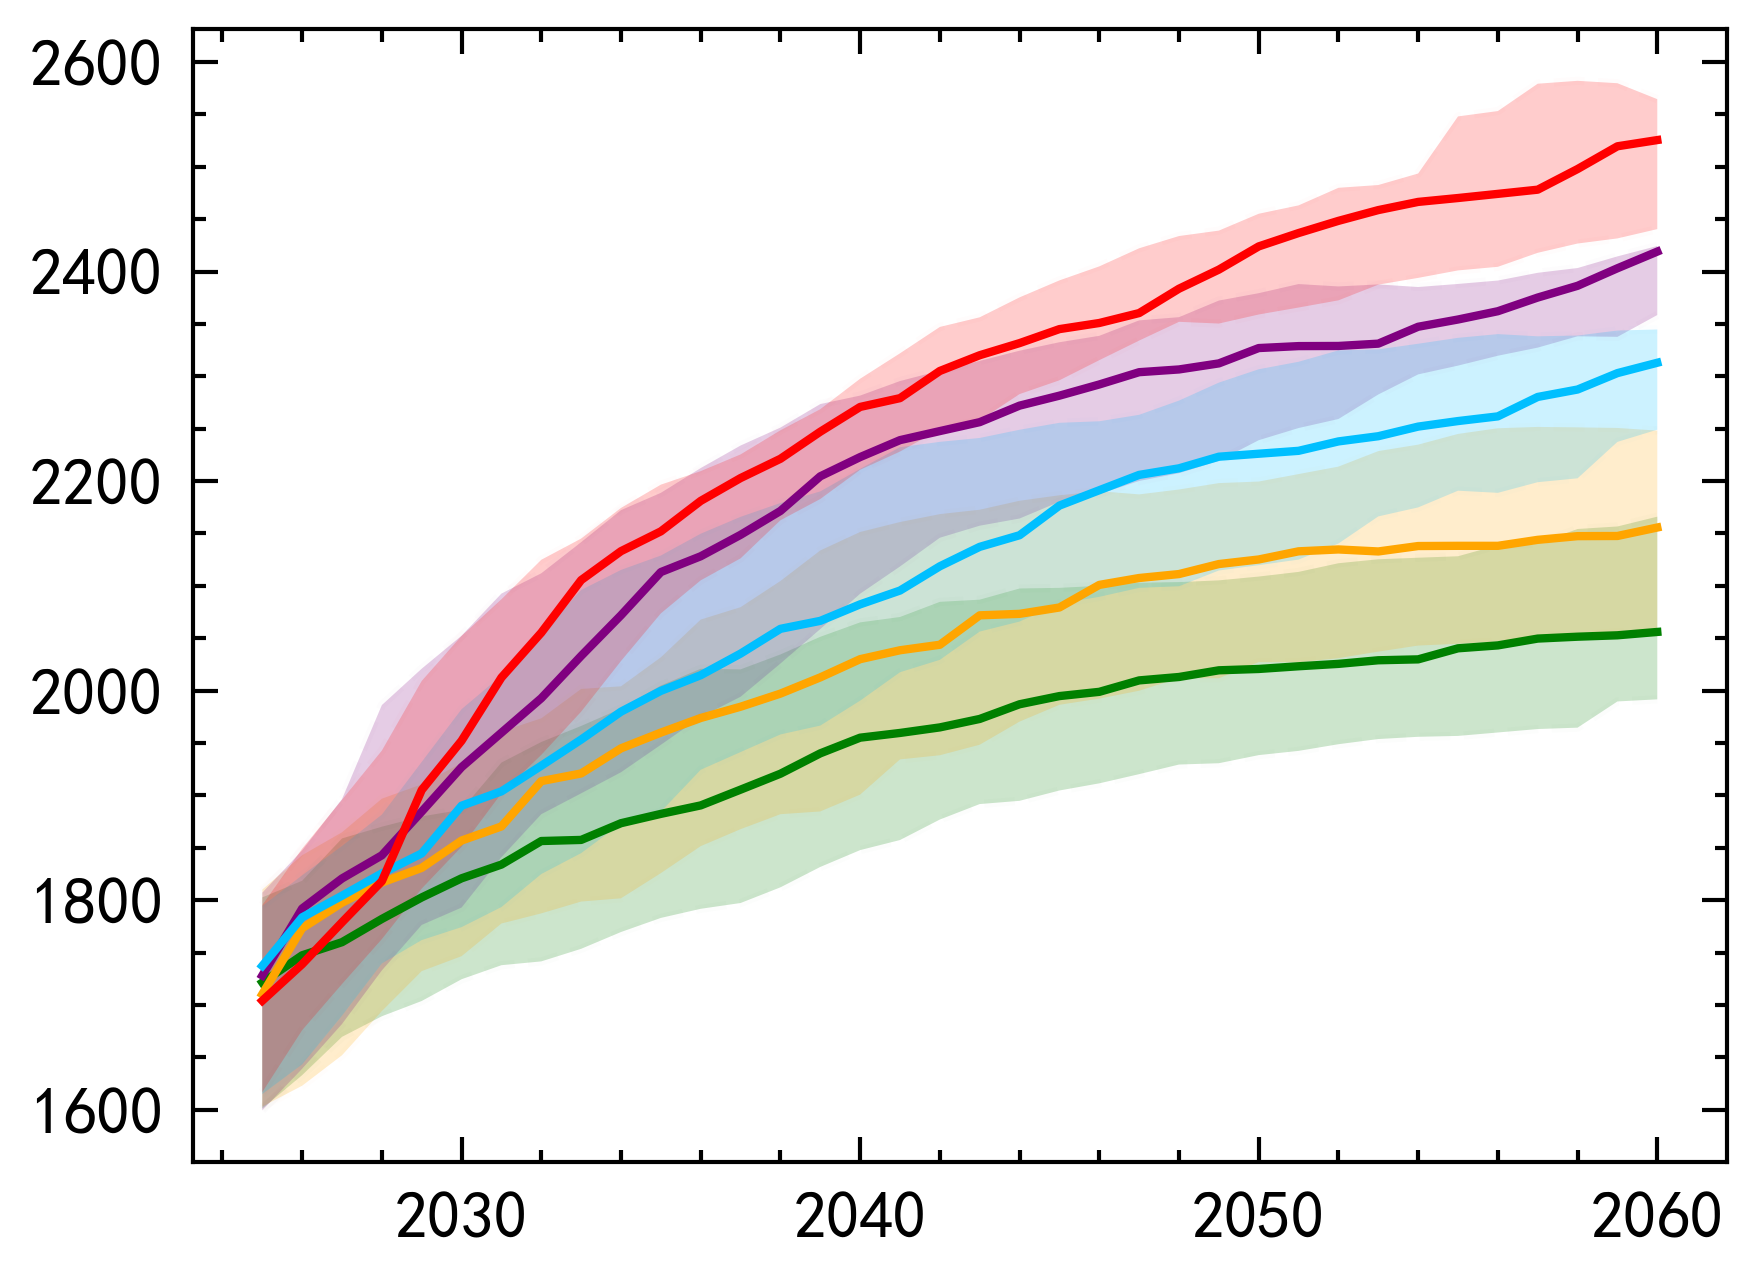

In [37]:
draw_uncertainty(uncertainties_qg, 'SSP1', 'g', 'SSP1')
draw_uncertainty(uncertainties_qg, 'SSP2', 'orange', 'SSP2')
draw_uncertainty(uncertainties_qg, 'SSP3', 'purple', 'SSP3')
draw_uncertainty(uncertainties_qg, 'SSP4', 'deepskyblue', 'SSP4')
draw_uncertainty(uncertainties_qg, 'SSP5', 'red', 'SSP5')

In [40]:
def draw_co2_uncertainty(df, ssp, color, label):

    SSP = df[df['SSP'] == ssp]

    plt.plot(SSP['YEAR'], SSP['Sum_new_standard_future_GHG_After_AD'], 
             color=color, linestyle='-',
             alpha=1,label=label)
    plt.plot(SSP['YEAR'], SSP['Sum_new_standard_future_GHG_After_AD+'], 
             color=color, linestyle='--',
             alpha=0.01)
    plt.plot(SSP['YEAR'], SSP['Sum_new_standard_future_GHG_After_AD-'], 
             color=color, linestyle='--',
             alpha=0.01)
    plt.fill_between(SSP['YEAR'], SSP['Sum_new_standard_future_GHG_After_AD-'],
                 SSP['Sum_new_standard_future_GHG_After_AD+'],
                 facecolor=color, alpha=0.2)

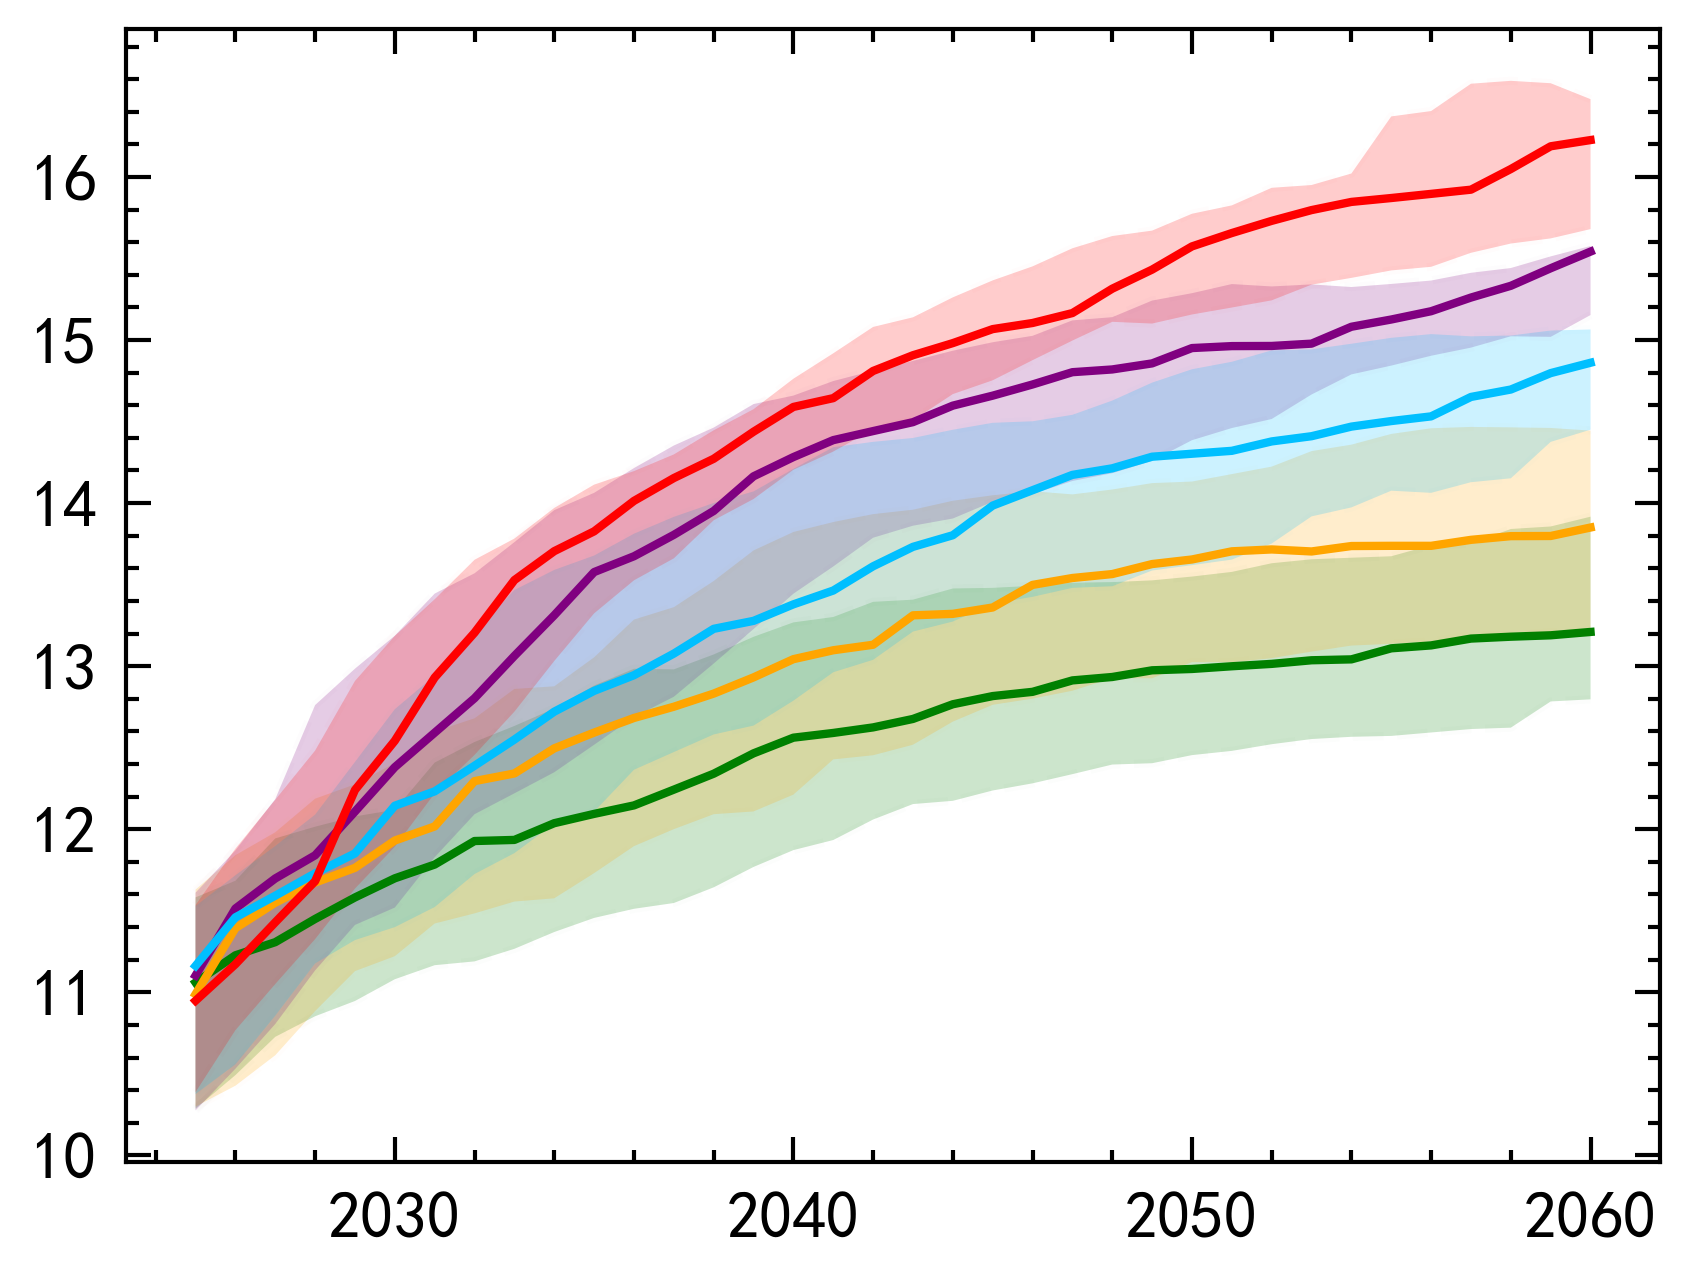

In [41]:
draw_co2_uncertainty(uncertainties_qg, 'SSP1', 'g', 'SSP1')
draw_co2_uncertainty(uncertainties_qg, 'SSP2', 'orange', 'SSP2')
draw_co2_uncertainty(uncertainties_qg, 'SSP3', 'purple', 'SSP3')
draw_co2_uncertainty(uncertainties_qg, 'SSP4', 'deepskyblue', 'SSP4')
draw_co2_uncertainty(uncertainties_qg, 'SSP5', 'red', 'SSP5')